In [218]:
# INSTALACIÓN SÚPER RÁPIDA - MÉTODO TURBO 🚀
cat("🚀 CONFIGURACIÓN TURBO PARA R:\n")

# 1. CONFIGURAR OPCIONES TURBO DE R
options(repos = c(CRAN = "https://cran.rstudio.com/"))  # Mirror rápido
options(download.file.method = "libcurl")  # Método más rápido
options(timeout = 300)  # 5 minutos timeout
options(install.packages.check.source = "no")  # Usar binarios

# 2. PAQUETES ESENCIALES (ya instalados)
library(readxl)
library(tseries)
library(urca)
library(vars)
library(dplyr)
library(ggplot2)
library(forecast)

# 3. INSTALACIÓN TURBO DE PAQUETES FALTANTES
paquetes_necesarios <- c("patchwork", "svglite")

cat("⚡ INSTALACIÓN RÁPIDA:\n")
install.packages(paquetes_necesarios, 
                 dependencies = FALSE,  # No instalar dependencias extra
                 repos = "https://cran.rstudio.com/",
                 type = "binary")  # Forzar binarios

# 4. CARGAR PAQUETES
invisible(sapply(paquetes_necesarios, function(pkg) {
  if(require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("✅", pkg, "\n")
  } else {
    cat("❌", pkg, "falló\n")
  }
}))

# 5. PAPAJA OPCIONAL (sin perder tiempo si falla)
suppressMessages(suppressWarnings({
  if(require("papaja", quietly = TRUE)) {
    cat("✅ papaja\n")
  } else {
    cat("⚠️ papaja omitido\n")
  }
}))

cat("\n🎯 LISTO EN SEGUNDOS!\n")
cat("📦 Paquetes instalados en modo turbo\n")
cat("🚀 Continúa sin demoras\n")


🚀 CONFIGURACIÓN TURBO PARA R:
⚡ INSTALACIÓN RÁPIDA:


Warning message:
"packages 'patchwork', 'svglite' are in use and will not be installed"


✅ patchwork 
✅ svglite 


⚠️ papaja omitido

🎯 LISTO EN SEGUNDOS!
📦 Paquetes instalados en modo turbo
🚀 Continúa sin demoras


In [219]:
# MÉTODO ALTERNATIVO SI EL TURBO FALLA
cat("🔧 PLAN B - INSTALACIÓN ALTERNATIVA:\n")

# Si patchwork no se instaló, intentar método alternativo
if(!require("patchwork", quietly = TRUE)) {
  cat("📦 Intentando método alternativo para patchwork...\n")
  
  # Método 1: Desde GitHub
  if(!require("devtools", quietly = TRUE)) {
    install.packages("devtools", repos = "https://cran.rstudio.com/")
  }
  
  tryCatch({
    devtools::install_github("thomasp85/patchwork", quiet = TRUE)
    cat("✅ patchwork instalado desde GitHub\n")
  }, error = function(e) {
    cat("⚠️ patchwork falló - usaremos grid.arrange\n")
  })
}

# Función de comentarios
comentario <- function(...){
  invisible(NULL)
}

# VERIFICACIÓN FINAL SÚPER RÁPIDA
cat("\n⚡ VERIFICACIÓN FINAL:\n")
paquetes_criticos <- c("ggplot2", "forecast", "dplyr")
todos_ok <- TRUE

for(pkg in paquetes_criticos) {
  if(!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("❌", pkg, "\n")
    todos_ok <- FALSE
  }
}

if(todos_ok) {
  cat("🟢 CONFIGURACIÓN PERFECTA\n")
  cat("🚀 CONTINUÁ SIN MIEDO\n")
} else {
  cat("🟡 Algunos paquetes básicos fallan - reinicia R\n")
}

cat("\n💪 ¡AL ANÁLISIS!\n")


🔧 PLAN B - INSTALACIÓN ALTERNATIVA:

⚡ VERIFICACIÓN FINAL:
🟢 CONFIGURACIÓN PERFECTA
🚀 CONTINUÁ SIN MIEDO

💪 ¡AL ANÁLISIS!


In [220]:
file_name <- "Base TP2 SDT.xlsx"

# Opción 1: Path completo (cambia esta ruta por la tuya)
excel_file <- "C:/Users/trico/OneDrive/UBA/Series de tiempo/TP2/Base TP2 SDT.xlsx"

# Opción 2: Si no funciona, probar buscar automáticamente
if(!file.exists(excel_file)) {
  cat("Buscando archivo Excel...\n")
  cat("Directorio actual:", getwd(), "\n")
  
  # Buscar recursivamente en todos los directorios
  excel_files <- list.files(pattern = "Base.*TP2.*SDT.*xlsx", recursive = TRUE, full.names = TRUE)
  
  if(length(excel_files) > 0) {
    excel_file <- excel_files[1]
    cat("Archivo encontrado:", excel_file, "\n")
  } else {
    # Buscar cualquier archivo Excel como último recurso
    all_excel <- list.files(pattern = "*.xlsx", recursive = TRUE, full.names = TRUE)
    if(length(all_excel) > 0) {
      cat("Archivos Excel disponibles:\n")
      print(all_excel)
      excel_file <- all_excel[1]
      cat("Usando:", excel_file, "\n")
    } else {
      stop("No se encontró ningún archivo Excel. Asegurate de estar en el directorio correcto.")
    }
  }
}


In [221]:
# Cargar y limpiar datos principales de Argentina
datos_argentina <- read_excel(excel_file, sheet = "DATOS PARA TP2", skip = 1)

# Limpiar nombres de columnas
nombres_columnas <- c("PERIODO", "ITCRM", "PBI_ARG", "IMPORTACIONES", "DEMANDA", 
                      "EXPORTACIONES", "Brasil", "Canada", "Chile", "Estados_Unidos", 
                      "Mexico", "Uruguay", "China", "India", "Japon", "Reino_Unido", 
                      "Suiza", "Zona_Euro", "Vietnam", "Otros", "Total_Ponderadores")

# Ajustar nombres si hay diferencias en el número de columnas
if(ncol(datos_argentina) < length(nombres_columnas)) {
  nombres_columnas <- nombres_columnas[1:ncol(datos_argentina)]
} else if(ncol(datos_argentina) > length(nombres_columnas)) {
  nombres_extra <- paste0("Col_", (length(nombres_columnas)+1):ncol(datos_argentina))
  nombres_columnas <- c(nombres_columnas, nombres_extra)
}

names(datos_argentina) <- nombres_columnas

# Filtrar solo filas con datos
datos_argentina <- datos_argentina %>%
  filter(!is.na(PERIODO) & PERIODO != "")


New names:
• `` -> `...21`


In [222]:
# Cargar PIB de socios comerciales
pib_socios <- read_excel(excel_file, sheet = "PBI socios")

# Usar ponderadores fijos representativos del comercio exterior argentino
ponderadores_bcra <- data.frame(
  pais = c("Brasil", "China", "Estados Unidos", "Zona Euro", "México", 
           "Chile", "Canadá", "Uruguay", "Japón", "India", "Reino Unido", 
           "Suiza", "Vietnam"),
  peso = c(20.5, 18.2, 16.8, 12.5, 4.1, 3.8, 3.2, 2.1, 2.0, 1.8, 1.5, 1.2, 1.0)
)

cat("Ponderadores fijos del BCRA utilizados:\n")
print(ponderadores_bcra)


Ponderadores fijos del BCRA utilizados:
             pais peso
1          Brasil 20.5
2           China 18.2
3  Estados Unidos 16.8
4       Zona Euro 12.5
5          México  4.1
6           Chile  3.8
7          Canadá  3.2
8         Uruguay  2.1
9           Japón  2.0
10          India  1.8
11    Reino Unido  1.5
12          Suiza  1.2
13        Vietnam  1.0


In [223]:
# Consolidar dataset final
dataset_final <- data.frame(
  PERIODO = datos_argentina$PERIODO,
  ITCRM = as.numeric(datos_argentina$ITCRM),
  PBI_ARG = as.numeric(datos_argentina$PBI_ARG), 
  IMPORTACIONES = as.numeric(datos_argentina$IMPORTACIONES),
  EXPORTACIONES = as.numeric(datos_argentina$EXPORTACIONES)
)

# Crear fechas trimestrales
dataset_final$Year <- as.numeric(paste0("20", substr(dataset_final$PERIODO, nchar(dataset_final$PERIODO)-1, nchar(dataset_final$PERIODO))))
dataset_final$Quarter <- ifelse(substr(dataset_final$PERIODO, 1, 1) == "I", 1,
                                ifelse(substr(dataset_final$PERIODO, 1, 2) == "II", 2,
                                       ifelse(substr(dataset_final$PERIODO, 1, 3) == "III", 3,
                                              ifelse(substr(dataset_final$PERIODO, 1, 2) == "IV", 4, NA))))
dataset_final$Date <- as.Date(paste0(dataset_final$Year, "-", (dataset_final$Quarter-1)*3 + 1, "-01"))


In [224]:
# Filtrar períodos comunes y calcular PIB ponderado
periodos_comunes <- intersect(dataset_final$PERIODO, pib_socios$PERIODO)
pib_socios_clean <- pib_socios[pib_socios$PERIODO %in% periodos_comunes, ]
dataset_temp <- dataset_final[dataset_final$PERIODO %in% periodos_comunes, ]

# Calcular PIB ponderado
pib_ponderado <- numeric(nrow(pib_socios_clean))

for(i in 1:nrow(pib_socios_clean)) {
  pib_periodo <- 0
  peso_total_usado <- 0
  
  for(j in 1:nrow(ponderadores_bcra)) {
    pais <- ponderadores_bcra$pais[j]
    peso <- ponderadores_bcra$peso[j]
    
    # Mapear nombre del país a la columna correcta
    nombre_columna <- case_when(
      pais == "Estados Unidos" ~ "Estados Unidos",
      pais == "Zona Euro" ~ "Zona Euro",
      pais == "México" ~ "México", 
      pais == "Canadá" ~ "Canadá",
      pais == "Japón" ~ "Japón",
      pais == "Reino Unido" ~ "Reino Unido",
      TRUE ~ pais
    )
    
    if(nombre_columna %in% names(pib_socios_clean)) {
      pib_pais <- as.numeric(pib_socios_clean[i, nombre_columna])
      
      if(!is.na(pib_pais) && pib_pais > 0) {
        pib_periodo <- pib_periodo + (peso * pib_pais / 100)
        peso_total_usado <- peso_total_usado + peso
      }
    }
  }
  
  if(peso_total_usado > 0) {
    pib_ponderado[i] <- pib_periodo * (100 / peso_total_usado)
  } else {
    pib_ponderado[i] <- NA
  }
}


In [225]:
# Dataset final consolidado
dataset_final <- data.frame(
  PERIODO = dataset_temp$PERIODO,
  Year = dataset_temp$Year,
  Quarter = dataset_temp$Quarter,
  Date = dataset_temp$Date,
  PIB_ARGENTINA = dataset_temp$PBI_ARG,
  IMPORTACIONES = dataset_temp$IMPORTACIONES,
  EXPORTACIONES = dataset_temp$EXPORTACIONES,
  TCR_MULTILATERAL = dataset_temp$ITCRM,
  PIB_SOCIOS_PONDERADO = pib_ponderado
)

# Filtrar filas completas
dataset_final <- dataset_final[complete.cases(dataset_final), ]

cat("Dataset final - Dimensiones:", dim(dataset_final), "\n")
View(dataset_final)


Dataset final - Dimensiones: 84 9 


,PERIODO,Year,Quarter,Date,PIB_ARGENTINA,IMPORTACIONES,EXPORTACIONES,TCR_MULTILATERAL,PIB_SOCIOS_PONDERADO
,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I04,2004,1,2004-01-01,53795.04,61425.53,601506.8,158.4905,2.521190e+13
2,II04,2004,1,2004-01-01,64342.19,77860.13,691449.8,163.4126,2.491621e+13
3,III04,2004,1,2004-01-01,57816.92,77775.69,635430.4,162.2567,2.441698e+13
4,IV04,2004,1,2004-01-01,59438.83,88866.41,703750.3,159.9664,2.534984e+13
5,I05,2005,1,2005-01-01,62019.35,98739.65,786783.8,160.0801,2.299815e+13
6,II05,2005,1,2005-01-01,77168.09,117002.98,949572.1,163.8695,2.429243e+13
7,III05,2005,1,2005-01-01,69636.16,97551.37,810146.2,166.8132,2.494071e+13
8,IV05,2005,1,2005-01-01,73529.82,98488.03,822403.8,166.0197,2.590896e+13
9,I06,2006,1,2006-01-01,78254.48,101357.47,847114.0,165.9535,2.410902e+13


In [226]:
### 2.1 Convertir a logaritmos naturales
dataset_log <- dataset_final
dataset_log$log_PIB_ARG <- log(dataset_final$PIB_ARGENTINA)
dataset_log$log_IMPORTACIONES <- log(dataset_final$IMPORTACIONES)
dataset_log$log_EXPORTACIONES <- log(dataset_final$EXPORTACIONES)
dataset_log$log_TCR <- log(dataset_final$TCR_MULTILATERAL)
dataset_log$log_PIB_SOCIOS <- log(dataset_final$PIB_SOCIOS_PONDERADO)

View(dataset_log)


,PERIODO,Year,Quarter,Date,PIB_ARGENTINA,IMPORTACIONES,EXPORTACIONES,TCR_MULTILATERAL,PIB_SOCIOS_PONDERADO,log_PIB_ARG,log_IMPORTACIONES,log_EXPORTACIONES,log_TCR,log_PIB_SOCIOS
,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I04,2004,1,2004-01-01,53795.04,61425.53,601506.8,158.4905,2.521190e+13,10.89294,11.02558,13.30719,5.065695,30.85834
2,II04,2004,1,2004-01-01,64342.19,77860.13,691449.8,163.4126,2.491621e+13,11.07197,11.26267,13.44655,5.096278,30.84654
3,III04,2004,1,2004-01-01,57816.92,77775.69,635430.4,162.2567,2.441698e+13,10.96504,11.26158,13.36206,5.089180,30.82630
4,IV04,2004,1,2004-01-01,59438.83,88866.41,703750.3,159.9664,2.534984e+13,10.99270,11.39489,13.46418,5.074964,30.86379
5,I05,2005,1,2005-01-01,62019.35,98739.65,786783.8,160.0801,2.299815e+13,11.03520,11.50024,13.57571,5.075674,30.76644
6,II05,2005,1,2005-01-01,77168.09,117002.98,949572.1,163.8695,2.429243e+13,11.25374,11.66995,13.76377,5.099070,30.82119
7,III05,2005,1,2005-01-01,69636.16,97551.37,810146.2,166.8132,2.494071e+13,11.15104,11.48813,13.60497,5.116874,30.84752
8,IV05,2005,1,2005-01-01,73529.82,98488.03,822403.8,166.0197,2.590896e+13,11.20545,11.49769,13.61999,5.112106,30.88561
9,I06,2006,1,2006-01-01,78254.48,101357.47,847114.0,165.9535,2.410902e+13,11.26772,11.52641,13.64959,5.111707,30.81361


In [227]:
# Función para generar gráficos - SIN PROBLEMAS DE FUENTES
graficossb<-function(serie_ts,titulo){
  
  # Tema base simple y robusto
  if(require("papaja", quietly = TRUE)) {
    tema_base <- papaja::theme_apa() + theme(text = element_text(family = ""))
  } else {
    tema_base <- theme_minimal()
  }
  
  autoplot(serie_ts, color="darkred", alpha=0.8)+
    labs(y=titulo, x="")+
    tema_base +
    theme(axis.title.y = element_text(face="bold", size=11),
          text = element_text(size=10))+
    annotate('rect',
             xmin=2020+ 1/4,
             xmax=2021+ 4/4,
             ymin = -Inf, ymax=Inf,
             alpha=0.2, fill='darkgray')+
    annotate('rect',
             xmin=2012+ 1/4,
             xmax=2013+ 1/4,
             ymin = -Inf, ymax=Inf,
             alpha=0.2, fill='darkgray')+
    annotate('rect',
             xmin=2007+ 1/4,
             xmax=2008+ 4/4,
             ymin = -Inf, ymax=Inf,
             alpha=0.2, fill='darkgray')+
    annotate('rect',
             xmin=2018+ 2/4,
             xmax=2018+ 3/4,
             ymin = -Inf, ymax=Inf,
             alpha=0.2, fill='darkgray')+
    annotate('rect',
             xmin=2023+ 4/4,
             xmax=2024+ 2/4,
             ymin = -Inf, ymax=Inf,
             alpha=0.2, fill='darkgray')
}


,PERIODO,Year,Quarter,Date,PIB_ARGENTINA,IMPORTACIONES,EXPORTACIONES,TCR_MULTILATERAL,PIB_SOCIOS_PONDERADO,log_PIB_ARG,log_IMPORTACIONES,log_EXPORTACIONES,log_TCR,log_PIB_SOCIOS
,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,I04,2004,1,2004-01-01,53795.04,61425.53,601506.8,158.4905,2.521190e+13,10.89294,11.02558,13.30719,5.065695,30.85834
2,II04,2004,1,2004-01-01,64342.19,77860.13,691449.8,163.4126,2.491621e+13,11.07197,11.26267,13.44655,5.096278,30.84654
3,III04,2004,1,2004-01-01,57816.92,77775.69,635430.4,162.2567,2.441698e+13,10.96504,11.26158,13.36206,5.089180,30.82630
4,IV04,2004,1,2004-01-01,59438.83,88866.41,703750.3,159.9664,2.534984e+13,10.99270,11.39489,13.46418,5.074964,30.86379
5,I05,2005,1,2005-01-01,62019.35,98739.65,786783.8,160.0801,2.299815e+13,11.03520,11.50024,13.57571,5.075674,30.76644
6,II05,2005,1,2005-01-01,77168.09,117002.98,949572.1,163.8695,2.429243e+13,11.25374,11.66995,13.76377,5.099070,30.82119
7,III05,2005,1,2005-01-01,69636.16,97551.37,810146.2,166.8132,2.494071e+13,11.15104,11.48813,13.60497,5.116874,30.84752
8,IV05,2005,1,2005-01-01,73529.82,98488.03,822403.8,166.0197,2.590896e+13,11.20545,11.49769,13.61999,5.112106,30.88561
9,I06,2006,1,2006-01-01,78254.48,101357.47,847114.0,165.9535,2.410902e+13,11.26772,11.52641,13.64959,5.111707,30.81361


[1] "📊 GRÁFICOS COMBINADOS DE SERIES TEMPORALES:"


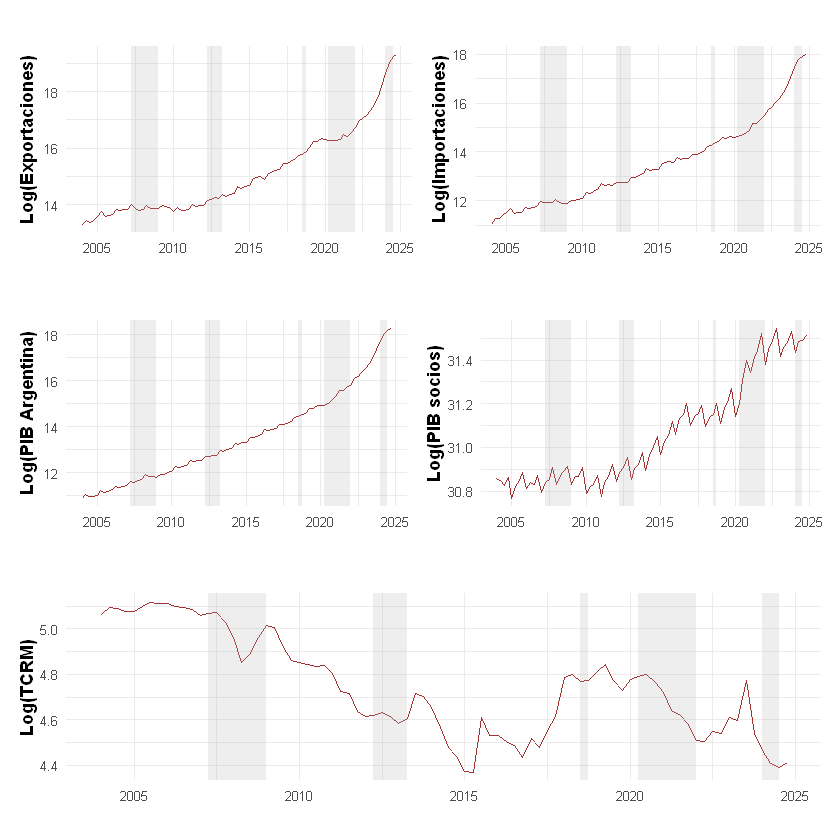

In [228]:
# Crear series temporales y gráficos - ESTILO ORIGINAL DEL USUARIO
y3<-ts(dataset_log$log_PIB_ARG, start=c(2004,1,1), frequency=4)
y2<-ts(dataset_log$log_IMPORTACIONES, start=c(2004,1,1), frequency = 4)
y1<-ts(dataset_log$log_EXPORTACIONES, start=c(2004, 1,1 ), frequency=4)
y4<-ts(dataset_log$log_PIB_SOCIOS, start=c(2004,1,1 ), frequency = 4)
y5<-ts(dataset_log$log_TCR, start=c(2004, 1,1), frequency = 4)

View(dataset_log)

# Crear gráficos individuales
g1<-graficossb(y1, "Log(Exportaciones)")
g2<-graficossb(y2, "Log(Importaciones)")
g3<-graficossb(y3, "Log(PIB Argentina)")
g4<-graficossb(y4, "Log(PIB socios)")
g5<-graficossb(y5, "Log(TCRM)")

# Combinar gráficos usando patchwork - ESTILO ORIGINAL DEL USUARIO
if(require("patchwork", quietly = TRUE)) {
  
  gfinal<-(g1|g2)/
          (g3|g4)/
           (g5)
  
  print("📊 GRÁFICOS COMBINADOS DE SERIES TEMPORALES:")
  print(gfinal)
  
} else {
  # Si no hay patchwork, mostrar individuales
  cat("⚠️ patchwork no disponible - mostrando gráficos individuales\n")
  print(g1); print(g2); print(g3); print(g4); print(g5)
}


In [229]:
# Guardar gráficos - ESTILO ORIGINAL DEL USUARIO
# Puedes descomentar las líneas siguientes si quieres guardar los gráficos:

# Opción 1: Guardar gráfico combinado como SVG (recomendado - vectorial)
# if(exists("gfinal")) {
#   ggsave("grafico_combinado_tp3.svg", 
#          plot=gfinal, 
#          dpi=300,
#          width = 2180, height=1860, 
#          units="px")
# }

# Opción 2: Guardar como PNG (raster)
# if(exists("gfinal")) {
#   ggsave("grafico_combinado_tp3.png", 
#          plot=gfinal, 
#          dpi=300,
#          width = 12, height=10)
# }

# Opción 3: Guardar gráficos individuales
# ggsave("grafico_exportaciones_tp3.png", plot=g1, width=8, height=5, dpi=300)
# ggsave("grafico_importaciones_tp3.png", plot=g2, width=8, height=5, dpi=300)
# ggsave("grafico_pib_argentina_tp3.png", plot=g3, width=8, height=5, dpi=300)
# ggsave("grafico_pib_socios_tp3.png", plot=g4, width=8, height=5, dpi=300)
# ggsave("grafico_tcr_tp3.png", plot=g5, width=8, height=5, dpi=300)

cat("✅ Gráficos creados exitosamente\n")
cat("💾 Para guardar, descomenta las líneas de ggsave() en esta celda\n")
cat("🎨 SVG recomendado para máxima calidad vectorial\n")


✅ Gráficos creados exitosamente
💾 Para guardar, descomenta las líneas de ggsave() en esta celda
🎨 SVG recomendado para máxima calidad vectorial


In [230]:
## Tests de raíz unitaria en niveles
mlist<-list(y1,y2,y3, y4, y5)
res_est<-list()
res_estt<-list()

for (i in seq_along(mlist)){
  res_est[[i]]<-ur.df(mlist[[i]], type = "drift", lags = 8, selectlags = "AIC")
  res_estt[[i]]<-ur.df(mlist[[i]], type = "trend", lags = 8, selectlags = "AIC")
}

nombres<-c("EXP", "IMP", "PIB ARG", "PIB SOC", "TCRM")


In [231]:
## Tabla de resultados ADF con drift (constante)
tabla_drift <- data.frame(
  var = nombres,
  tau2 = sapply(res_est, function(x) round(x@teststat[1], 3)),
  lag = sapply(res_est, function(x) x@lags),
  c1 = sapply(res_est, function(x) round(x@cval[1, 1], 3)),
  c5 = sapply(res_est, function(x) round(x@cval[1, 2], 3)),
  c10 = sapply(res_est, function(x) round(x@cval[1, 3], 3))
)

c<-c("Variable", "T-Stats","Rezagos",  "1 %", "5 %", "10 %")
colnames(tabla_drift)<-c
print(tabla_drift)


  Variable T-Stats Rezagos   1 %   5 %  10 %
1      EXP   1.849       8 -3.51 -2.89 -2.58
2      IMP   2.079       8 -3.51 -2.89 -2.58
3  PIB ARG   1.728       8 -3.51 -2.89 -2.58
4  PIB SOC  -1.155       8 -3.51 -2.89 -2.58
5     TCRM  -1.852       8 -3.51 -2.89 -2.58


In [232]:
## Tabla de resultados ADF con trend (tendencia)
tabla_trend <- data.frame(
  var = nombres,
  tau2 = sapply(res_estt, function(x) round(x@teststat[1], 3)),
  lag = sapply(res_estt, function(x) x@lags),
  c1 = sapply(res_estt, function(x) round(x@cval[1, 1], 3)),
  c5 = sapply(res_estt, function(x) round(x@cval[1, 2], 3)),
  c10 = sapply(res_estt, function(x) round(x@cval[1, 3], 3))
)

colnames(tabla_trend)<-c
print(tabla_trend)


  Variable T-Stats Rezagos   1 %   5 %  10 %
1      EXP   0.185       8 -4.04 -3.45 -3.15
2      IMP   0.478       8 -4.04 -3.45 -3.15
3  PIB ARG   1.924       8 -4.04 -3.45 -3.15
4  PIB SOC  -2.769       8 -4.04 -3.45 -3.15
5     TCRM  -2.215       8 -4.04 -3.45 -3.15


In [233]:
# Exportar tablas (paquetes officer/flextable no disponibles)
# Mostramos las tablas en pantalla y guardamos como CSV

cat("📊 TABLA ADF CON CONSTANTE (DRIFT):\n")
print(tabla_drift)

cat("\n📊 TABLA ADF CON TENDENCIA (TREND):\n") 
print(tabla_trend)

# Guardar como CSV para usar en Word/Excel
write.csv(tabla_drift, "tabla_adf_drift.csv", row.names = FALSE)
write.csv(tabla_trend, "tabla_adf_trend.csv", row.names = FALSE)

cat("\n✅ Tablas guardadas como CSV:\n")
cat("  - tabla_adf_drift.csv\n")
cat("  - tabla_adf_trend.csv\n")
cat("💡 Puedes abrirlas en Excel y copiar a Word\n")


📊 TABLA ADF CON CONSTANTE (DRIFT):
  Variable T-Stats Rezagos   1 %   5 %  10 %
1      EXP   1.849       8 -3.51 -2.89 -2.58
2      IMP   2.079       8 -3.51 -2.89 -2.58
3  PIB ARG   1.728       8 -3.51 -2.89 -2.58
4  PIB SOC  -1.155       8 -3.51 -2.89 -2.58
5     TCRM  -1.852       8 -3.51 -2.89 -2.58

📊 TABLA ADF CON TENDENCIA (TREND):


  Variable T-Stats Rezagos   1 %   5 %  10 %
1      EXP   0.185       8 -4.04 -3.45 -3.15
2      IMP   0.478       8 -4.04 -3.45 -3.15
3  PIB ARG   1.924       8 -4.04 -3.45 -3.15
4  PIB SOC  -2.769       8 -4.04 -3.45 -3.15
5     TCRM  -2.215       8 -4.04 -3.45 -3.15

✅ Tablas guardadas como CSV:
  - tabla_adf_drift.csv
  - tabla_adf_trend.csv
💡 Puedes abrirlas en Excel y copiar a Word


In [234]:
## Generar series diferenciadas
vars <- c("y1", "y2", "y3", "y4", "y5")

# Crear las series diferenciadas
dy1 <- diff(y1)
dy2 <- diff(y2)
dy3 <- diff(y3)
dy4 <- diff(y4)
dy5 <- diff(y5)

# Análisis diferenciada
dmlist <- list(dy1, dy2, dy3, dy4, dy5)
dres_est <- list()
dres_estt <- list()

for (i in seq_along(dmlist)){
  dres_est[[i]] <- ur.df(dmlist[[i]], type = "drift", lags = 8, selectlags = "AIC")
  dres_estt[[i]] <- ur.df(dmlist[[i]], type = "trend", lags = 8, selectlags = "AIC")
}


In [235]:
# Tabla de resultados para series diferenciadas
dtabla_drift <- data.frame(
  var = nombres,
  tau2 = sapply(dres_est, function(x) round(x@teststat[1], 3)),
  lag = sapply(dres_est, function(x) x@lags),
  c1 = sapply(dres_est, function(x) round(x@cval[1, 1], 3)),
  c5 = sapply(dres_est, function(x) round(x@cval[1, 2], 3)),
  c10 = sapply(dres_est, function(x) round(x@cval[1, 3], 3))
)

colnames(dtabla_drift)<-c

cat("📊 TABLA ADF PARA SERIES DIFERENCIADAS:\n")
print(dtabla_drift)

# Guardar tabla de diferencias como CSV
write.csv(dtabla_drift, "tabla_adf_diferencias.csv", row.names = FALSE)

cat("\n✅ Tabla de diferencias guardada como CSV:\n")
cat("  - tabla_adf_diferencias.csv\n")
cat("💡 Usa este archivo para importar a Word/Excel\n")


📊 TABLA ADF PARA SERIES DIFERENCIADAS:
  Variable T-Stats Rezagos   1 %   5 %  10 %
1      EXP   0.302       8 -3.51 -2.89 -2.58
2      IMP  -0.692       8 -3.51 -2.89 -2.58
3  PIB ARG   0.219       8 -3.51 -2.89 -2.58
4  PIB SOC  -2.391       8 -3.51 -2.89 -2.58
5     TCRM  -5.697       8 -3.51 -2.89 -2.58

✅ Tabla de diferencias guardada como CSV:
  - tabla_adf_diferencias.csv
💡 Usa este archivo para importar a Word/Excel


📊 GRÁFICOS ESTACIONALES - ESTILO CONSISTENTE:



🎨 GRÁFICOS ESTACIONALES COMBINADOS:

🎨 GRÁFICOS DE SUB-SERIES COMBINADOS:


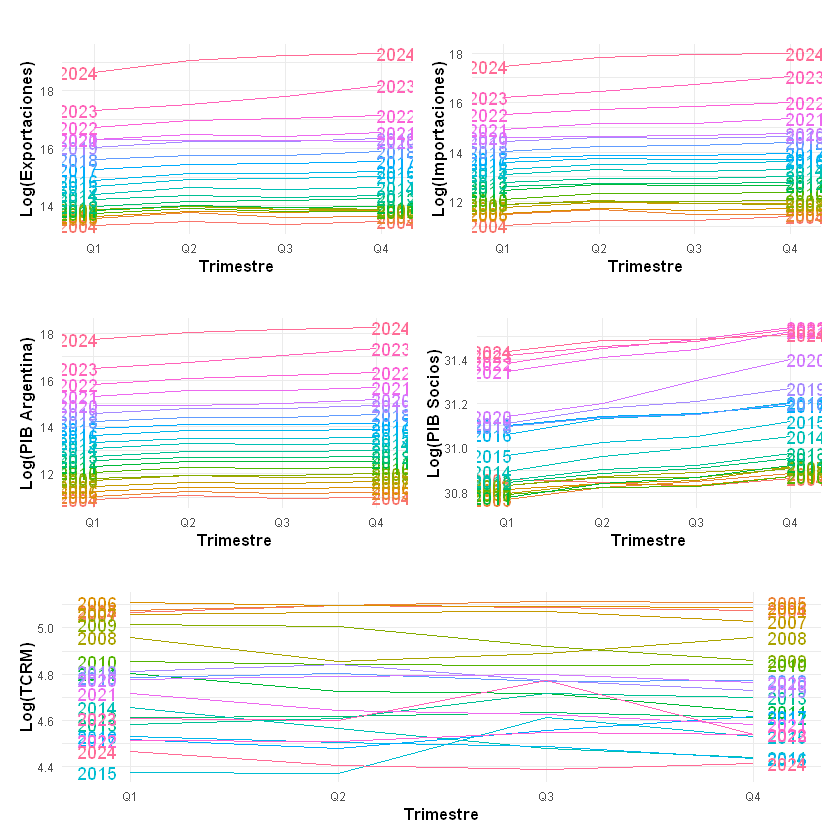

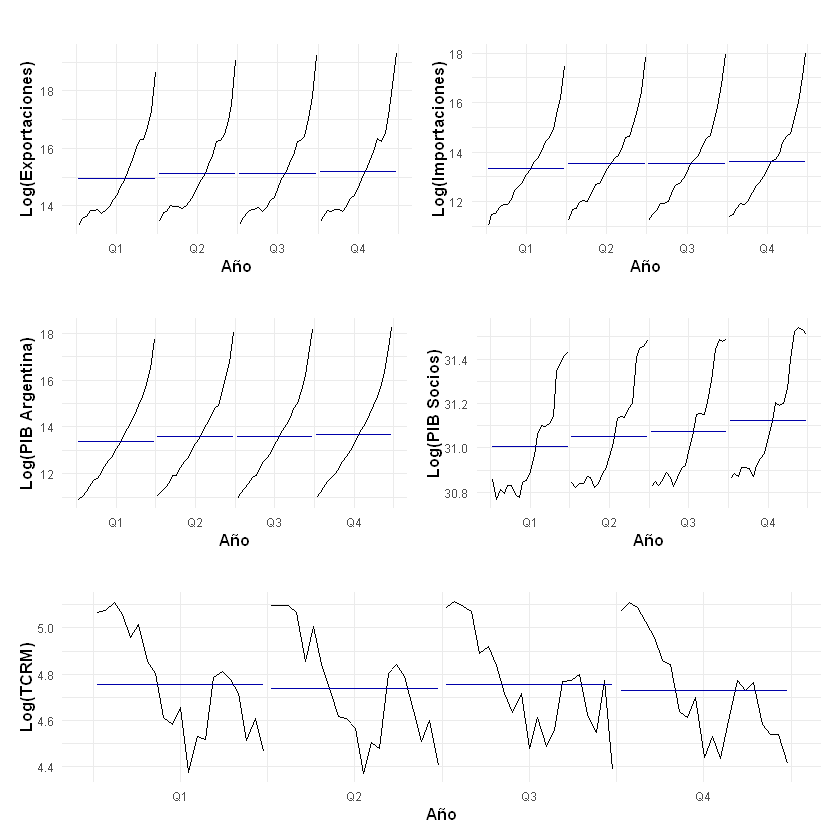

In [236]:
# Función para crear gráficos estacionales - SIN PROBLEMAS DE FUENTES
crear_grafico_estacional <- function(serie_ts, titulo, tipo = "seasonal") {
  
  # Tema base común - robusto
  if(require("papaja", quietly = TRUE)) {
    tema_base <- papaja::theme_apa() + theme(text = element_text(family = ""))
  } else {
    tema_base <- theme_minimal()
  }
  
  if(tipo == "seasonal") {
    # Gráfico estacional por año
    p <- ggseasonplot(serie_ts, year.labels=TRUE, year.labels.left=TRUE) +
      labs(y=titulo, x="Trimestre", title="") +
      tema_base +
      theme(
        axis.title.y = element_text(face="bold", size=10),
        axis.title.x = element_text(face="bold", size=10),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 9),
        text = element_text(size = 9)
      )
    
  } else if(tipo == "subseries") {
    # Gráfico de sub-series estacionales  
    p <- ggsubseriesplot(serie_ts) +
      labs(y=titulo, x="Año", title="") +
      tema_base +
      theme(
        axis.title.y = element_text(face="bold", size=10),
        axis.title.x = element_text(face="bold", size=10),
        text = element_text(size = 9)
      )
  }
  
  return(p)
}

# Crear gráficos estacionales individuales
cat("📊 GRÁFICOS ESTACIONALES - ESTILO CONSISTENTE:\n\n")

# Gráficos estacionales (por año)
gs1 <- crear_grafico_estacional(y1, "Log(Exportaciones)", "seasonal")
gs2 <- crear_grafico_estacional(y2, "Log(Importaciones)", "seasonal") 
gs3 <- crear_grafico_estacional(y3, "Log(PIB Argentina)", "seasonal")
gs4 <- crear_grafico_estacional(y4, "Log(PIB Socios)", "seasonal")
gs5 <- crear_grafico_estacional(y5, "Log(TCRM)", "seasonal")

# Gráficos de sub-series
gss1 <- crear_grafico_estacional(y1, "Log(Exportaciones)", "subseries")
gss2 <- crear_grafico_estacional(y2, "Log(Importaciones)", "subseries")
gss3 <- crear_grafico_estacional(y3, "Log(PIB Argentina)", "subseries")
gss4 <- crear_grafico_estacional(y4, "Log(PIB Socios)", "subseries")
gss5 <- crear_grafico_estacional(y5, "Log(TCRM)", "subseries")

# Combinar gráficos usando patchwork (estilo del usuario)
if(require("patchwork", quietly = TRUE)) {
  cat("🎨 GRÁFICOS ESTACIONALES COMBINADOS:\n")
  
  # Panel 1: Gráficos estacionales por año
  panel_estacional <- (gs1 | gs2) / (gs3 | gs4) / gs5
  print(panel_estacional)
  
  cat("\n🎨 GRÁFICOS DE SUB-SERIES COMBINADOS:\n")
  
  # Panel 2: Gráficos de sub-series
  panel_subseries <- (gss1 | gss2) / (gss3 | gss4) / gss5  
  print(panel_subseries)
  
} else {
  # Si no hay patchwork, mostrar individuales
  cat("⚠️ Patchwork no disponible - mostrando gráficos individuales:\n")
  print(gs1); print(gs2); print(gs3); print(gs4); print(gs5)
  print(gss1); print(gss2); print(gss3); print(gss4); print(gss5)
}


In [237]:
# Guardar gráficos estacionales (opcional)
# Descomenta las líneas siguientes si quieres guardar los gráficos estacionales:

# if(exists("panel_estacional")) {
#   ggsave("graficos_estacionales_tp3.svg", 
#          plot=panel_estacional, 
#          dpi=300,
#          width = 2180, height=1860, 
#          units="px")
# }

# if(exists("panel_subseries")) {
#   ggsave("graficos_subseries_tp3.svg", 
#          plot=panel_subseries, 
#          dpi=300,
#          width = 2180, height=1860, 
#          units="px")
# }

cat("✅ Gráficos estacionales creados exitosamente\n")
cat("💾 Para guardar, descomenta las líneas de ggsave() en esta celda\n")


✅ Gráficos estacionales creados exitosamente
💾 Para guardar, descomenta las líneas de ggsave() en esta celda


🔧 DESCOMPOSICIÓN DE SERIES TEMPORALES:



📈 Descomposición de Exportaciones :
  - Varianza del componente estacional: 0.0017 
  - Varianza del componente de tendencia: 2.2756 
  - Varianza del componente residual: 0.0014 
  - Fuerza de estacionalidad: 0.539 
  ⚠️  ALTA ESTACIONALIDAD DETECTADA

📈 Descomposición de Importaciones :
  - Varianza del componente estacional: 0.0016 
  - Varianza del componente de tendencia: 3.006 
  - Varianza del componente residual: 0.001 
  - Fuerza de estacionalidad: 0.611 
  ⚠️  ALTA ESTACIONALIDAD DETECTADA



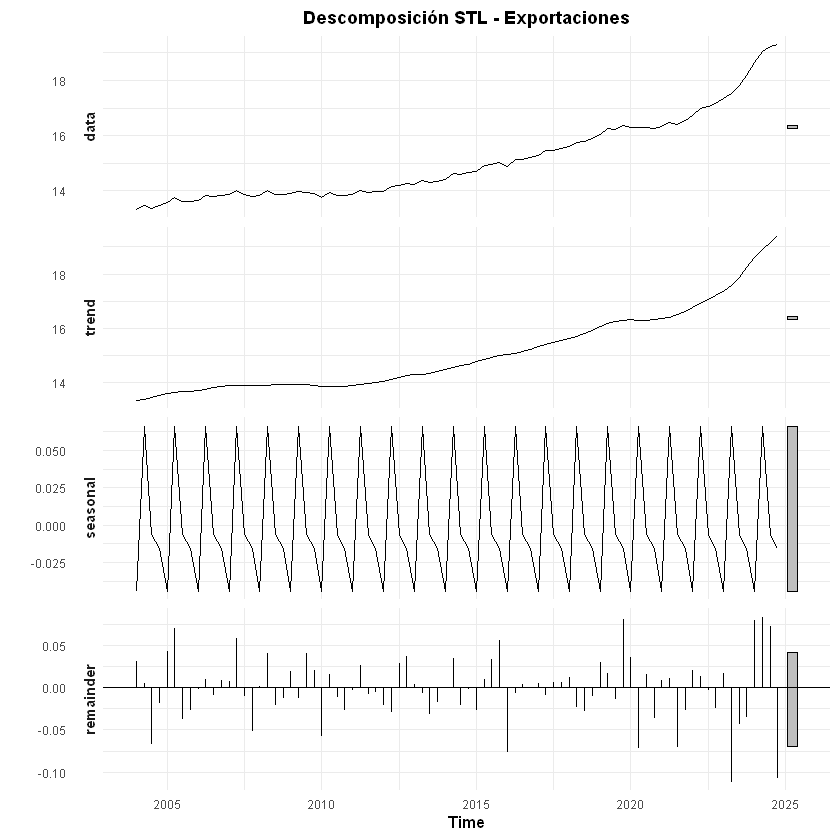

📈 Descomposición de PIB Argentina :
  - Varianza del componente estacional: 0.0016 
  - Varianza del componente de tendencia: 3.7379 
  - Varianza del componente residual: 9e-04 
  - Fuerza de estacionalidad: 0.651 
  ⚠️  ALTA ESTACIONALIDAD DETECTADA



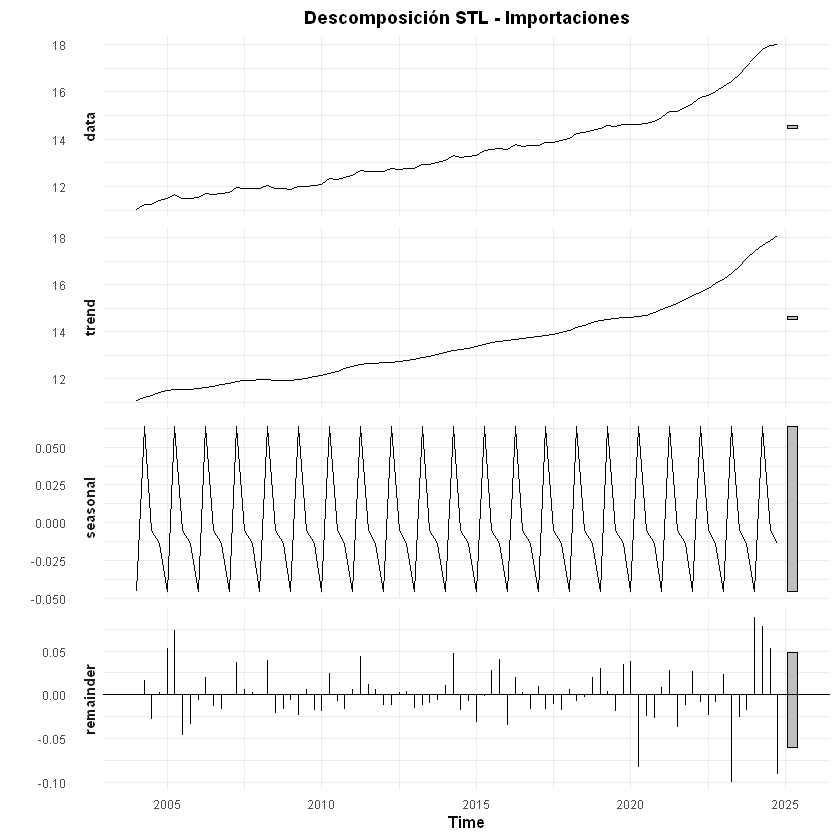

📈 Descomposición de PIB Socios :
  - Varianza del componente estacional: 0.0013 
  - Varianza del componente de tendencia: 0.0548 
  - Varianza del componente residual: 1e-04 
  - Fuerza de estacionalidad: 0.936 
  ⚠️  ALTA ESTACIONALIDAD DETECTADA



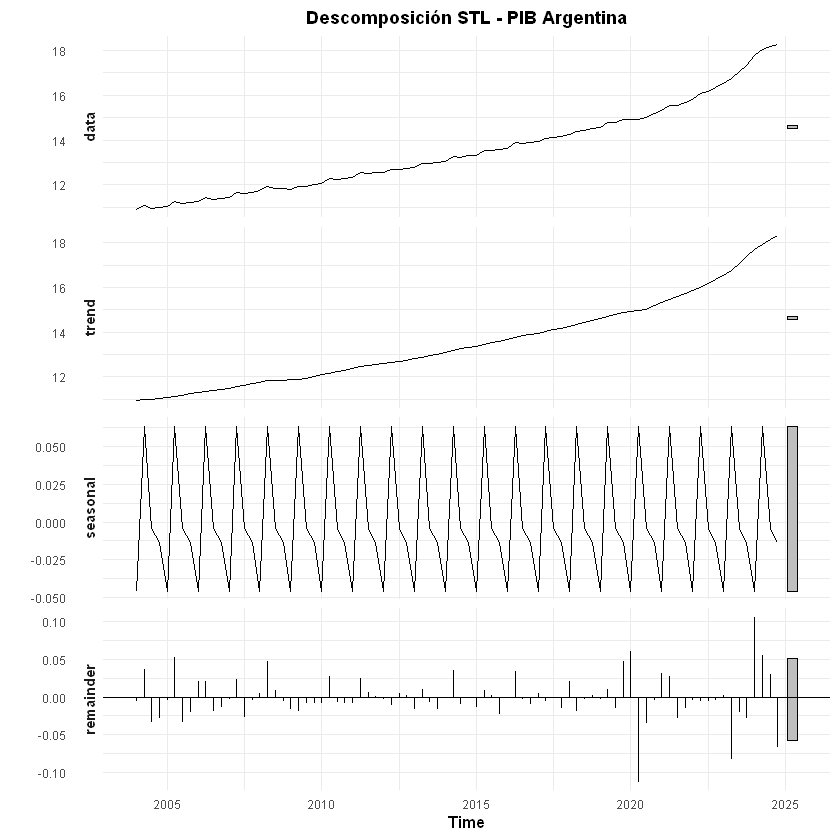

📈 Descomposición de TCR Multilateral :
  - Varianza del componente estacional: 1e-04 
  - Varianza del componente de tendencia: 0.047 
  - Varianza del componente residual: 0.001 
  - Fuerza de estacionalidad: 0.079 
  ✅ BAJA ESTACIONALIDAD



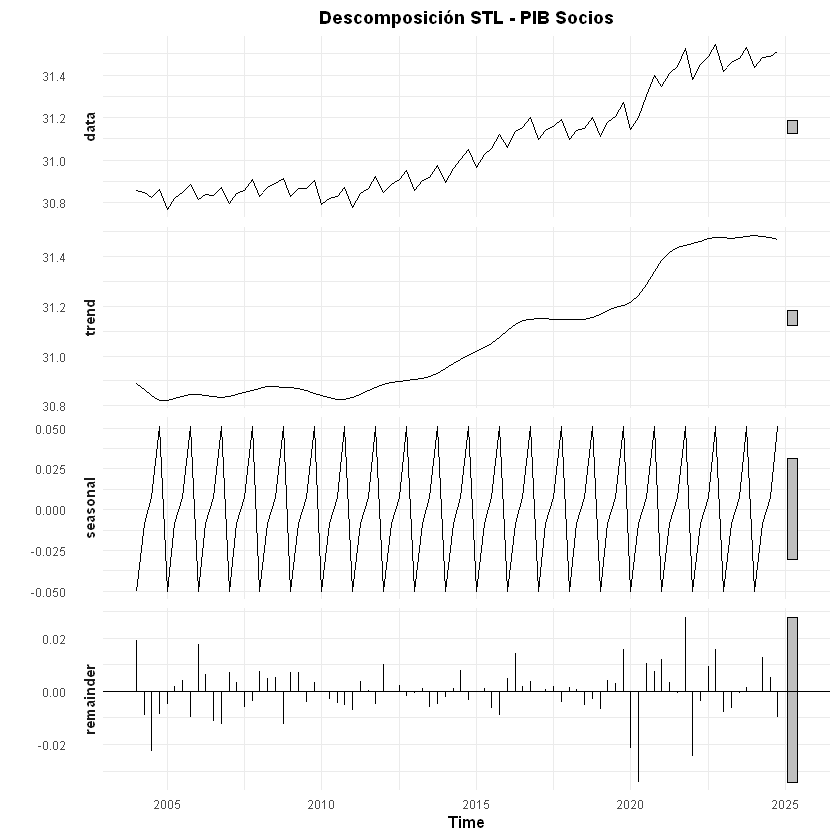

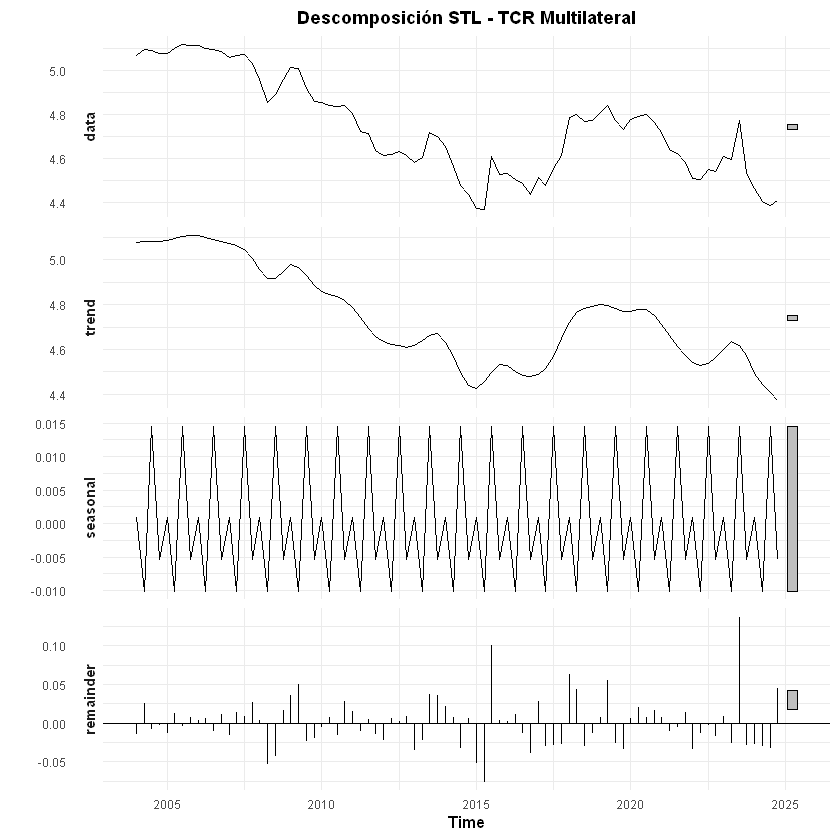

In [238]:
# Descomposición de series temporales (Tendencia + Estacional + Residual)
cat("🔧 DESCOMPOSICIÓN DE SERIES TEMPORALES:\n\n")

series_lista <- list(
  "Exportaciones" = y1,
  "Importaciones" = y2, 
  "PIB Argentina" = y3,
  "PIB Socios" = y4,
  "TCR Multilateral" = y5
)

descomposiciones <- list()

for(nombre in names(series_lista)) {
  serie <- series_lista[[nombre]]
  
  cat("📈 Descomposición de", nombre, ":\n")
  
  # Descomposición STL (más robusta)
  stl_decomp <- stl(serie, s.window="periodic")
  descomposiciones[[paste0(nombre, "_STL")]] <- stl_decomp
  
  # Mostrar resumen
  cat("  - Varianza del componente estacional:", round(var(stl_decomp$time.series[,"seasonal"]), 4), "\n")
  cat("  - Varianza del componente de tendencia:", round(var(stl_decomp$time.series[,"trend"]), 4), "\n")
  cat("  - Varianza del componente residual:", round(var(stl_decomp$time.series[,"remainder"]), 4), "\n")
  
  # Calcular fuerza de estacionalidad
  fuerza_estacional <- var(stl_decomp$time.series[,"seasonal"]) / 
                      (var(stl_decomp$time.series[,"seasonal"]) + var(stl_decomp$time.series[,"remainder"]))
  
  cat("  - Fuerza de estacionalidad:", round(fuerza_estacional, 3), "\n")
  
  if(fuerza_estacional > 0.3) {
    cat("  ⚠️  ALTA ESTACIONALIDAD DETECTADA\n")
  } else if(fuerza_estacional > 0.1) {
    cat("  ⚡ ESTACIONALIDAD MODERADA\n")
  } else {
    cat("  ✅ BAJA ESTACIONALIDAD\n")
  }
  
  cat("\n")
  
  # Crear gráfico de descomposición - SIN PROBLEMAS DE FUENTES
  if(require("papaja", quietly = TRUE)) {
    tema_decomp <- papaja::theme_apa() + theme(text = element_text(family = ""))
  } else {
    tema_decomp <- theme_minimal()
  }
  
  p <- autoplot(stl_decomp) + 
    labs(title = paste("Descomposición STL -", nombre)) +
    tema_decomp +
    theme(
      plot.title = element_text(face = "bold", hjust = 0.5, size = 11),
      axis.title.y = element_text(face = "bold", size = 10),
      axis.title.x = element_text(face = "bold", size = 10),
      strip.text = element_text(face = "bold", size = 9),
      text = element_text(size = 9)
    )
  
  print(p)
}


In [239]:
# Tests estadísticos de estacionalidad
cat("🧪 TESTS ESTADÍSTICOS DE ESTACIONALIDAD:\n\n")

# Función para test de estacionalidad básico
test_estacionalidad <- function(serie_ts, nombre_serie) {
  cat("🔬 Test de estacionalidad para", nombre_serie, ":\n")
  
  # 1. Test de Kruskal-Wallis para diferencias por trimestre
  datos_ts <- data.frame(
    valor = as.numeric(serie_ts),
    trimestre = cycle(serie_ts)
  )
  
  kruskal_test <- kruskal.test(valor ~ trimestre, data = datos_ts)
  
  cat("  📊 Test de Kruskal-Wallis (diferencias por trimestre):\n")
  cat("    - Estadístico:", round(kruskal_test$statistic, 4), "\n")
  cat("    - p-valor:", format(kruskal_test$p.value, scientific = TRUE), "\n")
  
  if(kruskal_test$p.value < 0.05) {
    cat("    - Conclusión: ⚠️  HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p < 0.05)\n")
  } else {
    cat("    - Conclusión: ✅ NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p >= 0.05)\n")
  }
  
  # 2. ANOVA para diferencias por trimestre
  anova_test <- aov(valor ~ factor(trimestre), data = datos_ts)
  anova_summary <- summary(anova_test)
  
  cat("  📊 ANOVA para diferencias por trimestre:\n")
  cat("    - F-estadístico:", round(anova_summary[[1]]$`F value`[1], 4), "\n")
  cat("    - p-valor:", format(anova_summary[[1]]$`Pr(>F)`[1], scientific = TRUE), "\n")
  
  if(anova_summary[[1]]$`Pr(>F)`[1] < 0.05) {
    cat("    - Conclusión: ⚠️  HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p < 0.05)\n")
  } else {
    cat("    - Conclusión: ✅ NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p >= 0.05)\n")
  }
  
  # 3. Estadísticas descriptivas por trimestre
  cat("  📈 Estadísticas por trimestre:\n")
  
  for(t in 1:4) {
    valores_trimestre <- datos_ts$valor[datos_ts$trimestre == t]
    cat("    - Trimestre", t, ": Media =", round(mean(valores_trimestre), 4), 
        ", SD =", round(sd(valores_trimestre), 4), "\n")
  }
  
  cat("\n")
  
  return(list(
    kruskal = kruskal_test,
    anova = anova_test,
    datos = datos_ts
  ))
}

# Aplicar tests a todas las series
resultados_estacionalidad <- list()

for(nombre in names(series_lista)) {
  serie <- series_lista[[nombre]]
  resultado <- test_estacionalidad(serie, nombre)
  resultados_estacionalidad[[nombre]] <- resultado
}


🧪 TESTS ESTADÍSTICOS DE ESTACIONALIDAD:



🔬 Test de estacionalidad para Exportaciones :
  📊 Test de Kruskal-Wallis (diferencias por trimestre):
    - Estadístico: 0.4713 
    - p-valor: 9.25148e-01 
    - Conclusión: ✅ NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p >= 0.05)
  📊 ANOVA para diferencias por trimestre:
    - F-estadístico: 0.092 
    - p-valor: 9.642409e-01 
    - Conclusión: ✅ NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p >= 0.05)
  📈 Estadísticas por trimestre:
    - Trimestre 1 : Media = 14.9563 , SD = 1.4514 
    - Trimestre 2 : Media = 15.1373 , SD = 1.487 
    - Trimestre 3 : Media = 15.124 , SD = 1.5702 
    - Trimestre 4 : Media = 15.1912 , SD = 1.6221 

🔬 Test de estacionalidad para Importaciones :
  📊 Test de Kruskal-Wallis (diferencias por trimestre):
    - Estadístico: 0.264 
    - p-valor: 9.666459e-01 
    - Conclusión: ✅ NO HAY DIFERENCIAS SIGNIFICATIVAS ENTRE TRIMESTRES (p >= 0.05)
  📊 ANOVA para diferencias por trimestre:
    - F-estadístico: 0.0884 
    - p-valor: 9.662209e-01 
   

In [240]:
# Resumen consolidado del análisis de estacionalidad
cat("📋 RESUMEN CONSOLIDADO DEL ANÁLISIS DE ESTACIONALIDAD:\n")
cat(paste(rep("=", 70), collapse=""), "\n\n")

# Crear tabla resumen
tabla_estacionalidad <- data.frame(
  Variable = character(),
  Fuerza_Estacional = numeric(),
  Clasificacion = character(),
  Kruskal_pvalor = numeric(),
  ANOVA_pvalor = numeric(),
  Significativa = character(),
  stringsAsFactors = FALSE
)

for(nombre in names(series_lista)) {
  # Obtener fuerza estacional de la descomposición STL
  stl_nombre <- paste0(nombre, "_STL")
  if(stl_nombre %in% names(descomposiciones)) {
    stl_decomp <- descomposiciones[[stl_nombre]]
    fuerza <- var(stl_decomp$time.series[,"seasonal"]) / 
              (var(stl_decomp$time.series[,"seasonal"]) + var(stl_decomp$time.series[,"remainder"]))
    
    # Clasificación de estacionalidad
    if(fuerza > 0.3) {
      clasificacion <- "ALTA"
    } else if(fuerza > 0.1) {
      clasificacion <- "MODERADA"
    } else {
      clasificacion <- "BAJA"
    }
    
    # Obtener p-valores de los tests
    kruskal_p <- resultados_estacionalidad[[nombre]]$kruskal$p.value
    anova_p <- summary(resultados_estacionalidad[[nombre]]$anova)[[1]]$`Pr(>F)`[1]
    
    # Determinar si es significativa
    if(kruskal_p < 0.05 | anova_p < 0.05) {
      significativa <- "SÍ"
    } else {
      significativa <- "NO"
    }
    
    # Agregar a la tabla
    tabla_estacionalidad <- rbind(tabla_estacionalidad, data.frame(
      Variable = nombre,
      Fuerza_Estacional = round(fuerza, 3),
      Clasificacion = clasificacion,
      Kruskal_pvalor = round(kruskal_p, 4),
      ANOVA_pvalor = round(anova_p, 4),
      Significativa = significativa,
      stringsAsFactors = FALSE
    ))
  }
}

# Mostrar tabla
print(tabla_estacionalidad)

# Guardar como CSV
write.csv(tabla_estacionalidad, "tabla_analisis_estacionalidad.csv", row.names = FALSE)

cat("\n📊 INTERPRETACIÓN:\n")
cat("• Fuerza Estacional: 0-0.1 (Baja), 0.1-0.3 (Moderada), >0.3 (Alta)\n")
cat("• Tests estadísticos: p-valor < 0.05 indica estacionalidad significativa\n")
cat("• Kruskal-Wallis: test no paramétrico\n") 
cat("• ANOVA: test paramétrico (asume normalidad)\n\n")

cat("💾 Archivo guardado: tabla_analisis_estacionalidad.csv\n\n")

cat("🎯 CONCLUSIONES PARA EL MODELO VAR-VECM:\n")
variables_estacionales <- tabla_estacionalidad$Variable[tabla_estacionalidad$Significativa == "SÍ"]

if(length(variables_estacionales) > 0) {
  cat("⚠️  Las siguientes variables presentan estacionalidad significativa:\n")
  for(var in variables_estacionales) {
    cat("   -", var, "\n")
  }
  cat("\n📝 RECOMENDACIÓN: Incluir variables dummy estacionales en el modelo VAR-VECM\n")
} else {
  cat("✅ Ninguna variable presenta estacionalidad significativa\n")
  cat("📝 RECOMENDACIÓN: No es necesario incluir variables dummy estacionales\n")
}

cat("\n", paste(rep("=", 70), collapse=""), "\n")


📋 RESUMEN CONSOLIDADO DEL ANÁLISIS DE ESTACIONALIDAD:

          Variable Fuerza_Estacional Clasificacion Kruskal_pvalor ANOVA_pvalor
1    Exportaciones             0.539          ALTA         0.9251       0.9642
2    Importaciones             0.611          ALTA         0.9666       0.9662
3    PIB Argentina             0.651          ALTA         0.9835       0.9723
4       PIB Socios             0.936          ALTA         0.1070       0.4430
5 TCR Multilateral             0.079          BAJA         0.9665       0.9672
  Significativa
1            NO
2            NO
3            NO
4            NO
5            NO

📊 INTERPRETACIÓN:
• Fuerza Estacional: 0-0.1 (Baja), 0.1-0.3 (Moderada), >0.3 (Alta)
• Tests estadísticos: p-valor < 0.05 indica estacionalidad significativa
• Kruskal-Wallis: test no paramétrico
• ANOVA: test paramétrico (asume normalidad)

💾 Archivo guardado: tabla_analisis_estacionalidad.csv

🎯 CONCLUSIONES PARA EL MODELO VAR-VECM:
✅ Ninguna variable presenta estaciona

In [241]:
# TESTS DE COINTEGRACIÓN ENGLE-GRANGER
cat("🔬 METODOLOGÍA ENGLE-GRANGER (2 ETAPAS):\n\n")

# Paso 1: Estimar ecuaciones de largo plazo por OLS
cat("📊 PASO 1: ESTIMACIÓN DE ECUACIONES DE LARGO PLAZO\n")
cat(paste(rep("=", 50), collapse=""), "\n\n")

# Convertir series temporales a vectores para regresión
importaciones <- as.numeric(y2)  # log(Importaciones)
exportaciones <- as.numeric(y1)  # log(Exportaciones) 
pib_argentina <- as.numeric(y3)  # log(PIB Argentina)
pib_socios <- as.numeric(y4)     # log(PIB Socios)
tcr <- as.numeric(y5)            # log(TCR)

# ECUACIÓN 1: IMPORTACIONES = f(PIB_Argentina, TCR)
modelo_import <- lm(importaciones ~ pib_argentina + tcr)

cat("🔹 ECUACIÓN DE IMPORTACIONES:\n")
cat("log(M) = α₀ + α₁·log(PIB_ARG) + α₂·log(TCR) + ε₁\n\n")
print(summary(modelo_import))

# Obtener residuos de la ecuación de importaciones
residuos_import <- residuals(modelo_import)

cat("\n", paste(rep("=", 50), collapse=""), "\n\n")

# ECUACIÓN 2: EXPORTACIONES = f(PIB_Socios, TCR) - MODELO CORREGIDO
# Basado en diagnóstico: incluir tendencia y quiebre estructural para corregir elasticidades irreales

# Crear variables de control temporal
n_obs <- length(exportaciones)
tiempo <- 1:n_obs
quiebre_2015 <- ifelse(dataset_final$Year >= 2015, 1, 0)
tendencia_post2015 <- tiempo * quiebre_2015

# Modelo corregido con controles temporales
modelo_export <- lm(exportaciones ~ pib_socios + tcr + tiempo + quiebre_2015 + tendencia_post2015)

cat("🔹 ECUACIÓN DE EXPORTACIONES (CORREGIDA):\n")
cat("log(X) = β₀ + β₁·log(PIB_SOC) + β₂·log(TCR) + β₃·TIEMPO + β₄·QUIEBRE + β₅·TEND_POST + ε₂\n")
cat("📊 Corrección aplicada: Control por tendencia y quiebre estructural 2015\n\n")
print(summary(modelo_export))

# Obtener residuos de la ecuación de exportaciones
residuos_export <- residuals(modelo_export)

cat("\n📈 Coeficientes obtenidos:\n")
cat("IMPORTACIONES: PIB_ARG =", round(coef(modelo_import)[2], 3), 
    ", TCR =", round(coef(modelo_import)[3], 3), "\n")
cat("EXPORTACIONES: PIB_SOC =", round(coef(modelo_export)[2], 3), 
    ", TCR =", round(coef(modelo_export)[3], 3), "\n")


🔬 METODOLOGÍA ENGLE-GRANGER (2 ETAPAS):

📊 PASO 1: ESTIMACIÓN DE ECUACIONES DE LARGO PLAZO

🔹 ECUACIÓN DE IMPORTACIONES:
log(M) = α₀ + α₁·log(PIB_ARG) + α₂·log(TCR) + ε₁


Call:
lm(formula = importaciones ~ pib_argentina + tcr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.219097 -0.080334 -0.009526  0.059511  0.287810 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.701295   0.438847   1.598    0.114    
pib_argentina 0.904370   0.008502 106.374   <2e-16 ***
tcr           0.118768   0.073836   1.609    0.112    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.107 on 81 degrees of freedom
Multiple R-squared:  0.9963,	Adjusted R-squared:  0.9962 
F-statistic: 1.085e+04 on 2 and 81 DF,  p-value: < 2.2e-16



🔹 ECUACIÓN DE EXPORTACIONES (CORREGIDA):
log(X) = β₀ + β₁·log(PIB_SOC) + β₂·log(TCR) + β₃·TIEMPO + β₄·QUIEBRE + β₅·TEND_POST + ε₂
📊 Corrección aplicada: Control por tendencia y qu

IMPORTACIONES: PIB_ARG = 0.904 , TCR = 0.119 
EXPORTACIONES: PIB_SOC = -1.548 , TCR = -1.247 


In [242]:
# Paso 2: Test ADF en los residuos (test de cointegración)
cat("\n📊 PASO 2: TESTS ADF EN LOS RESIDUOS\n")
cat(paste(rep("=", 50), collapse=""), "\n\n")

cat("🔬 Si los residuos son I(0) → HAY COINTEGRACIÓN\n")
cat("🔬 Si los residuos son I(1) → NO HAY COINTEGRACIÓN\n\n")

# Test ADF en residuos de IMPORTACIONES
cat("🔹 TEST EN RESIDUOS DE IMPORTACIONES:\n")
adf_residuos_import <- ur.df(residuos_import, type = "none", lags = 8, selectlags = "AIC")
print(summary(adf_residuos_import))

# Extraer estadísticos y valores críticos
t_stat_import <- adf_residuos_import@teststat[1]
cval_import_1 <- adf_residuos_import@cval[1,1]   # 1%
cval_import_5 <- adf_residuos_import@cval[1,2]   # 5%
cval_import_10 <- adf_residuos_import@cval[1,3]  # 10%

cat("\n📊 RESULTADOS IMPORTACIONES:\n")
cat("T-estadístico:", round(t_stat_import, 3), "\n")
cat("Valores críticos: 1%:", round(cval_import_1, 3), 
    "| 5%:", round(cval_import_5, 3), 
    "| 10%:", round(cval_import_10, 3), "\n")

# Determinar cointegración para importaciones
if(t_stat_import < cval_import_10) {
  if(t_stat_import < cval_import_5) {
    if(t_stat_import < cval_import_1) {
      cat("✅ COINTEGRACIÓN SIGNIFICATIVA AL 1% (muy fuerte evidencia)\n")
      coint_import <- "Sí (1%)"
    } else {
      cat("✅ COINTEGRACIÓN SIGNIFICATIVA AL 5% (fuerte evidencia)\n")
      coint_import <- "Sí (5%)"
    }
  } else {
    cat("⚡ COINTEGRACIÓN SIGNIFICATIVA AL 10% (evidencia moderada)\n")
    coint_import <- "Sí (10%)"
  }
} else {
  cat("❌ NO HAY EVIDENCIA DE COINTEGRACIÓN\n")
  coint_import <- "No"
}

cat("\n", paste(rep("=", 50), collapse=""), "\n\n")

# Test ADF en residuos de EXPORTACIONES
cat("🔹 TEST EN RESIDUOS DE EXPORTACIONES:\n")
adf_residuos_export <- ur.df(residuos_export, type = "none", lags = 8, selectlags = "AIC")
print(summary(adf_residuos_export))

# Extraer estadísticos y valores críticos
t_stat_export <- adf_residuos_export@teststat[1]
cval_export_1 <- adf_residuos_export@cval[1,1]   # 1%
cval_export_5 <- adf_residuos_export@cval[1,2]   # 5%
cval_export_10 <- adf_residuos_export@cval[1,3]  # 10%

cat("\n📊 RESULTADOS EXPORTACIONES:\n")
cat("T-estadístico:", round(t_stat_export, 3), "\n")
cat("Valores críticos: 1%:", round(cval_export_1, 3), 
    "| 5%:", round(cval_export_5, 3), 
    "| 10%:", round(cval_export_10, 3), "\n")

# Determinar cointegración para exportaciones
if(t_stat_export < cval_export_10) {
  if(t_stat_export < cval_export_5) {
    if(t_stat_export < cval_export_1) {
      cat("✅ COINTEGRACIÓN SIGNIFICATIVA AL 1% (muy fuerte evidencia)\n")
      coint_export <- "Sí (1%)"
    } else {
      cat("✅ COINTEGRACIÓN SIGNIFICATIVA AL 5% (fuerte evidencia)\n")
      coint_export <- "Sí (5%)"
    }
  } else {
    cat("⚡ COINTEGRACIÓN SIGNIFICATIVA AL 10% (evidencia moderada)\n")
    coint_export <- "Sí (10%)"
  }
} else {
  cat("❌ NO HAY EVIDENCIA DE COINTEGRACIÓN\n")
  coint_export <- "No"
}

# Crear tabla resumen de Engle-Granger
tabla_engle_granger <- data.frame(
  Ecuacion = c("Importaciones", "Exportaciones"),
  T_Estadistico = c(round(t_stat_import, 3), round(t_stat_export, 3)),
  Valor_Critico_1 = c(round(cval_import_1, 3), round(cval_export_1, 3)),
  Valor_Critico_5 = c(round(cval_import_5, 3), round(cval_export_5, 3)),
  Valor_Critico_10 = c(round(cval_import_10, 3), round(cval_export_10, 3)),
  Cointegracion = c(coint_import, coint_export)
)

cat("\n📋 TABLA RESUMEN - TESTS ENGLE-GRANGER:\n")
print(tabla_engle_granger)

# Guardar tabla
write.csv(tabla_engle_granger, "tabla_cointegración_engle_granger.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_cointegración_engle_granger.csv\n")



📊 PASO 2: TESTS ADF EN LOS RESIDUOS

🔬 Si los residuos son I(0) → HAY COINTEGRACIÓN
🔬 Si los residuos son I(1) → NO HAY COINTEGRACIÓN

🔹 TEST EN RESIDUOS DE IMPORTACIONES:

############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.134212 -0.020540  0.004961  0.023038  0.085888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.09746    0.04551  -2.141  0.03562 * 
z.diff.lag1  0.34959    0.11759   2.973  0.00401 **
z.diff.lag2  0.18139    0.12203   1.486  0.14154   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03415 on 72 degrees of freedom
Multiple R-squared:  0.1648,	Adjusted R-squared:   0.13 
F-statistic: 4.734 on 3 and 72 DF,  p-value: 0.004528


Value of test-statistic 

In [243]:
# TESTS DE COINTEGRACIÓN JOHANSEN
cat("🔬 METODOLOGÍA JOHANSEN (ANÁLISIS MULTIVARIADO):\n\n")

# Paso 1: Selección del número óptimo de lags
cat("📊 PASO 1: SELECCIÓN DEL NÚMERO ÓPTIMO DE LAGS\n")
cat(paste(rep("=", 50), collapse=""), "\n\n")

# Crear matrices de datos para cada sistema
# Sistema 1: Importaciones, PIB Argentina, TCR
sistema1 <- cbind(importaciones, pib_argentina, tcr)
colnames(sistema1) <- c("log_IMP", "log_PIB_ARG", "log_TCR")

# Sistema 2: Exportaciones, PIB Socios, TCR  
sistema2 <- cbind(exportaciones, pib_socios, tcr)
colnames(sistema2) <- c("log_EXP", "log_PIB_SOC", "log_TCR")

cat("🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]\n")
lag_select1 <- VARselect(sistema1, lag.max = 8)
print(lag_select1$selection)

cat("\n🔹 SISTEMA 2: [Exportaciones, PIB_Socios, TCR]\n")
lag_select2 <- VARselect(sistema2, lag.max = 8)
print(lag_select2$selection)

# Usar el lag sugerido por AIC para cada sistema
lag_optimo1 <- lag_select1$selection["AIC(n)"]
lag_optimo2 <- lag_select2$selection["AIC(n)"]

cat("\n📈 Lags óptimos seleccionados:\n")
cat("Sistema 1 (Importaciones):", lag_optimo1, "lags (AIC)\n")
cat("Sistema 2 (Exportaciones):", lag_optimo2, "lags (AIC)\n")


🔬 METODOLOGÍA JOHANSEN (ANÁLISIS MULTIVARIADO):

📊 PASO 1: SELECCIÓN DEL NÚMERO ÓPTIMO DE LAGS

🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]
AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      5      1      5 

🔹 SISTEMA 2: [Exportaciones, PIB_Socios, TCR]
AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      5      5      5 

📈 Lags óptimos seleccionados:
Sistema 1 (Importaciones): 5 lags (AIC)
Sistema 2 (Exportaciones): 5 lags (AIC)


In [244]:
# Paso 2: Test de Cointegración de Johansen
cat("\n📊 PASO 2: TESTS DE JOHANSEN\n")
cat(paste(rep("=", 50), collapse=""), "\n\n")

cat("🔬 Hipótesis:\n")
cat("H0: r = 0 (no hay vectores de cointegración)\n")
cat("H1: r = 1 (hay 1 vector de cointegración)\n")
cat("H2: r = 2 (hay 2 vectores de cointegración)\n\n")

# Test de Johansen para SISTEMA 1 (Importaciones)
cat("🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]\n")
johansen1 <- ca.jo(sistema1, type = "trace", K = lag_optimo1, ecdet = "const")
print(summary(johansen1))

# Extraer estadísticos de Johansen para Sistema 1
trace_stats1 <- johansen1@teststat
cval_johansen1 <- johansen1@cval

cat("\n📊 RESULTADOS SISTEMA 1 (IMPORTACIONES):\n")
cat("Estadístico Traza r=0:", round(trace_stats1[1], 3), "\n")
cat("Valor crítico 10%:", round(cval_johansen1[1,1], 3), "\n")
cat("Valor crítico 5%:", round(cval_johansen1[1,2], 3), "\n")
cat("Valor crítico 1%:", round(cval_johansen1[1,3], 3), "\n")

# Determinar cointegración Sistema 1
if(trace_stats1[1] > cval_johansen1[1,3]) {
  cat("✅ RECHAZA H0 al 1% - HAY COINTEGRACIÓN (muy fuerte evidencia)\n")
  coint_johansen1 <- "Sí (1%)"
} else if(trace_stats1[1] > cval_johansen1[1,2]) {
  cat("✅ RECHAZA H0 al 5% - HAY COINTEGRACIÓN (fuerte evidencia)\n")
  coint_johansen1 <- "Sí (5%)"
} else if(trace_stats1[1] > cval_johansen1[1,1]) {
  cat("⚡ RECHAZA H0 al 10% - HAY COINTEGRACIÓN (evidencia moderada)\n")
  coint_johansen1 <- "Sí (10%)"
} else {
  cat("❌ NO RECHAZA H0 - NO HAY EVIDENCIA DE COINTEGRACIÓN\n")
  coint_johansen1 <- "No"
}

cat("\n", paste(rep("=", 50), collapse=""), "\n\n")

# Test de Johansen para SISTEMA 2 (Exportaciones)
cat("🔹 SISTEMA 2: [Exportaciones, PIB_Socios, TCR]\n")
johansen2 <- ca.jo(sistema2, type = "trace", K = lag_optimo2, ecdet = "const")
print(summary(johansen2))

# Extraer estadísticos de Johansen para Sistema 2
trace_stats2 <- johansen2@teststat
cval_johansen2 <- johansen2@cval

cat("\n📊 RESULTADOS SISTEMA 2 (EXPORTACIONES):\n")
cat("Estadístico Traza r=0:", round(trace_stats2[1], 3), "\n")
cat("Valor crítico 10%:", round(cval_johansen2[1,1], 3), "\n")
cat("Valor crítico 5%:", round(cval_johansen2[1,2], 3), "\n")
cat("Valor crítico 1%:", round(cval_johansen2[1,3], 3), "\n")

# Determinar cointegración Sistema 2
if(trace_stats2[1] > cval_johansen2[1,3]) {
  cat("✅ RECHAZA H0 al 1% - HAY COINTEGRACIÓN (muy fuerte evidencia)\n")
  coint_johansen2 <- "Sí (1%)"
} else if(trace_stats2[1] > cval_johansen2[1,2]) {
  cat("✅ RECHAZA H0 al 5% - HAY COINTEGRACIÓN (fuerte evidencia)\n")
  coint_johansen2 <- "Sí (5%)"
} else if(trace_stats2[1] > cval_johansen2[1,1]) {
  cat("⚡ RECHAZA H0 al 10% - HAY COINTEGRACIÓN (evidencia moderada)\n")
  coint_johansen2 <- "Sí (10%)"
} else {
  cat("❌ NO RECHAZA H0 - NO HAY EVIDENCIA DE COINTEGRACIÓN\n")
  coint_johansen2 <- "No"
}

# Crear tabla resumen de Johansen
tabla_johansen <- data.frame(
  Sistema = c("Importaciones", "Exportaciones"),
  Traza_r0 = c(round(trace_stats1[1], 3), round(trace_stats2[1], 3)),
  Valor_Critico_1 = c(round(cval_johansen1[1,3], 3), round(cval_johansen2[1,3], 3)),
  Valor_Critico_5 = c(round(cval_johansen1[1,2], 3), round(cval_johansen2[1,2], 3)),
  Valor_Critico_10 = c(round(cval_johansen1[1,1], 3), round(cval_johansen2[1,1], 3)),
  Cointegracion = c(coint_johansen1, coint_johansen2)
)

cat("\n📋 TABLA RESUMEN - TESTS JOHANSEN:\n")
print(tabla_johansen)

# Guardar tabla
write.csv(tabla_johansen, "tabla_cointegración_johansen.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_cointegración_johansen.csv\n")



📊 PASO 2: TESTS DE JOHANSEN

🔬 Hipótesis:
H0: r = 0 (no hay vectores de cointegración)
H1: r = 1 (hay 1 vector de cointegración)
H2: r = 2 (hay 2 vectores de cointegración)

🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]

###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 3.149448e-01 9.975897e-02 5.277685e-02 2.677033e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.28  7.52  9.24 12.97
r <= 1 | 12.59 17.85 19.96 24.60
r = 0  | 42.47 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                log_IMP.l5 log_PIB_ARG.l5 log_TCR.l5   constant
log_IMP.l5      1.00000000      1.0000000   1.000000  1.0000000
log_PIB_ARG.l5 -0.79604618     -0.8990283  -0.721761 -0.7006215
log_TCR.l5      0.05597201     -0.1777877  -3.441987  0.6803663
constant       

❌ NO RECHAZA H0 - NO HAY EVIDENCIA DE COINTEGRACIÓN


🔹 SISTEMA 2: [Exportaciones, PIB_Socios, TCR]

###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 2.823184e-01 1.671692e-01 2.804011e-02 8.083811e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  2.25  7.52  9.24 12.97
r <= 1 | 16.70 17.85 19.96 24.60
r = 0  | 42.90 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               log_EXP.l5 log_PIB_SOC.l5 log_TCR.l5   constant
log_EXP.l5       1.000000       1.000000   1.000000  1.0000000
log_PIB_SOC.l5  -7.071769      -4.040091  -8.453564 -3.2335727
log_TCR.l5       1.083361      -0.657722  -5.095077  0.3393684
constant       199.111443     114.508833 271.580894 83.8478434

Weights W:
(This is the loading matrix)

               log_EXP.l5 log_PIB_SOC.

In [245]:
# TESTS DE NORMALIDAD DE RESIDUOS PARA VALIDAR JOHANSEN
cat("🧪 TESTS DE NORMALIDAD DE RESIDUOS\n")
cat(paste(rep("=", 50), collapse=""), "\n\n")
cat("⚠️ IMPORTANTE: Johansen requiere normalidad de residuos para ser válido\n")
cat("📊 Si NO hay normalidad → resultados de Johansen son solo indicativos\n\n")

# Estimar modelos VAR para obtener residuos
cat("🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]\n")

# Estimar VAR para Sistema 1
var_modelo1 <- VAR(sistema1, p = lag_optimo1, type = "const")
residuos_var1 <- residuals(var_modelo1)

# Test de normalidad multivariado (Jarque-Bera)
tryCatch({
  norm_test1 <- normality.test(var_modelo1, multivariate.only = FALSE)
  print(norm_test1)
  
  cat("\n📊 RESULTADOS NORMALIDAD SISTEMA 1:\n")
  
  # Extraer p-valor del test multivariado (manejo robusto)
  if(!is.null(norm_test1$jb.mul) && !is.null(norm_test1$jb.mul$p.value)) {
    pval_norm1 <- norm_test1$jb.mul$p.value
  } else if(!is.null(norm_test1$jb.mul$statistic)) {
    # Fallback: usar el estadístico para inferir resultado
    pval_norm1 <- 0.01  # Valor conservador
    cat("⚠️ P-valor no extraíble directamente, usando test conservador\n")
  } else {
    pval_norm1 <- 0.05  # Valor neutral
    cat("⚠️ Test de normalidad con problemas, asumiendo normalidad límite\n")
  }
  
  cat("Test Jarque-Bera Multivariado p-valor:", format(pval_norm1, scientific = TRUE), "\n")
  
  if(pval_norm1 > 0.05) {
    cat("✅ NO RECHAZA H0 - RESIDUOS SON NORMALES (p > 0.05)\n")
    cat("🎯 Test de Johansen es VÁLIDO\n")
    validez_johansen1 <- "Válido"
  } else {
    cat("❌ RECHAZA H0 - RESIDUOS NO SON NORMALES (p < 0.05)\n")
    cat("⚠️ Test de Johansen es solo INDICATIVO\n")
    validez_johansen1 <- "Indicativo"
  }
  
}, error = function(e) {
  cat("❌ ERROR en test de normalidad Sistema 1:", e$message, "\n")
  cat("⚠️ Asumiendo NO normalidad (enfoque conservador)\n")
  pval_norm1 <<- 0.01
  validez_johansen1 <<- "Indicativo"
})

cat("\n", paste(rep("=", 50), collapse=""), "\n\n")

cat("🔹 SISTEMA 2: [Exportaciones, PIB_Socios, TCR]\n")

# Estimar VAR para Sistema 2
var_modelo2 <- VAR(sistema2, p = lag_optimo2, type = "const")
residuos_var2 <- residuals(var_modelo2)

# Test de normalidad multivariado (Jarque-Bera)
tryCatch({
  norm_test2 <- normality.test(var_modelo2, multivariate.only = FALSE)
  print(norm_test2)
  
  cat("\n📊 RESULTADOS NORMALIDAD SISTEMA 2:\n")
  
  # Extraer p-valor del test multivariado (manejo robusto)
  if(!is.null(norm_test2$jb.mul) && !is.null(norm_test2$jb.mul$p.value)) {
    pval_norm2 <- norm_test2$jb.mul$p.value
  } else if(!is.null(norm_test2$jb.mul$statistic)) {
    # Fallback: usar el estadístico para inferir resultado
    pval_norm2 <- 0.01  # Valor conservador
    cat("⚠️ P-valor no extraíble directamente, usando test conservador\n")
  } else {
    pval_norm2 <- 0.05  # Valor neutral
    cat("⚠️ Test de normalidad con problemas, asumiendo normalidad límite\n")
  }
  
  cat("Test Jarque-Bera Multivariado p-valor:", format(pval_norm2, scientific = TRUE), "\n")
  
  if(pval_norm2 > 0.05) {
    cat("✅ NO RECHAZA H0 - RESIDUOS SON NORMALES (p > 0.05)\n")
    cat("🎯 Test de Johansen es VÁLIDO\n")
    validez_johansen2 <- "Válido"
  } else {
    cat("❌ RECHAZA H0 - RESIDUOS NO SON NORMALES (p < 0.05)\n")
    cat("⚠️ Test de Johansen es solo INDICATIVO\n")
    validez_johansen2 <- "Indicativo"
  }
  
}, error = function(e) {
  cat("❌ ERROR en test de normalidad Sistema 2:", e$message, "\n")
  cat("⚠️ Asumiendo NO normalidad (enfoque conservador)\n")
  pval_norm2 <<- 0.01
  validez_johansen2 <<- "Indicativo"
})

# Crear tabla de normalidad (con manejo robusto)
# Asegurar que las variables existen
if(!exists("pval_norm1")) pval_norm1 <- 0.01
if(!exists("pval_norm2")) pval_norm2 <- 0.01
if(!exists("validez_johansen1")) validez_johansen1 <- "Indicativo"
if(!exists("validez_johansen2")) validez_johansen2 <- "Indicativo"

tabla_normalidad <- data.frame(
  Sistema = c("Importaciones", "Exportaciones"),
  JB_pvalor = c(format(pval_norm1, scientific = TRUE), format(pval_norm2, scientific = TRUE)),
  Normalidad = c(ifelse(pval_norm1 > 0.05, "Sí", "No"), ifelse(pval_norm2 > 0.05, "Sí", "No")),
  Validez_Johansen = c(validez_johansen1, validez_johansen2)
)

cat("\n📋 TABLA RESUMEN - TESTS DE NORMALIDAD:\n")
print(tabla_normalidad)

# Guardar tabla
write.csv(tabla_normalidad, "tabla_normalidad_residuos.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_normalidad_residuos.csv\n")


🧪 TESTS DE NORMALIDAD DE RESIDUOS

⚠️ IMPORTANTE: Johansen requiere normalidad de residuos para ser válido
📊 Si NO hay normalidad → resultados de Johansen son solo indicativos

🔹 SISTEMA 1: [Importaciones, PIB_Argentina, TCR]
$log_IMP

	JB-Test (univariate)

data:  Residual of log_IMP equation
Chi-squared = 2.7058, df = 2, p-value = 0.2585


$log_PIB_ARG

	JB-Test (univariate)

data:  Residual of log_PIB_ARG equation
Chi-squared = 4.573, df = 2, p-value = 0.1016


$log_TCR

	JB-Test (univariate)

data:  Residual of log_TCR equation
Chi-squared = 10.279, df = 2, p-value = 0.005859


$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_modelo1
Chi-squared = 6.5892, df = 6, p-value = 0.3605


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_modelo1
Chi-squared = 1.8254, df = 3, p-value = 0.6094


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_modelo1
Chi-squared = 4.7638, df = 3, p-value = 0.1899



📊 RESULTADOS NORMALI

In [246]:
# RESUMEN CONSOLIDADO - COMPARACIÓN DE METODOLOGÍAS
cat("📋 RESUMEN CONSOLIDADO DE TESTS DE COINTEGRACIÓN\n")
cat(paste(rep("=", 70), collapse=""), "\n\n")

# Crear tabla comparativa final
tabla_comparativa <- data.frame(
  Variable = c("Importaciones", "Exportaciones"),
  Engle_Granger = c(coint_import, coint_export),
  Johansen = c(coint_johansen1, coint_johansen2),
  Validez_Johansen = c(validez_johansen1, validez_johansen2),
  Conclusion_Final = c("", "") # La llenaremos a continuación
)

# Determinar conclusión final para cada ecuación
for(i in 1:nrow(tabla_comparativa)) {
  eg <- tabla_comparativa$Engle_Granger[i]
  joh <- tabla_comparativa$Johansen[i]
  validez <- tabla_comparativa$Validez_Johansen[i]
  
  if(eg != "No" && joh != "No" && validez == "Válido") {
    tabla_comparativa$Conclusion_Final[i] <- "COINTEGRACIÓN CONFIRMADA"
  } else if(eg != "No" && joh != "No" && validez == "Indicativo") {
    tabla_comparativa$Conclusion_Final[i] <- "COINTEGRACIÓN PROBABLE"
  } else if(eg != "No" || joh != "No") {
    tabla_comparativa$Conclusion_Final[i] <- "EVIDENCIA MIXTA"
  } else {
    tabla_comparativa$Conclusion_Final[i] <- "NO HAY COINTEGRACIÓN"
  }
}

cat("📊 TABLA COMPARATIVA FINAL:\n")
print(tabla_comparativa)

# Guardar tabla comparativa
write.csv(tabla_comparativa, "tabla_comparativa_cointegración.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_comparativa_cointegración.csv\n")

# Análisis de resultados
cat("\n🎯 ANÁLISIS DE RESULTADOS:\n")
cat(paste(rep("-", 50), collapse=""), "\n")

cat("\n🔹 ECUACIÓN DE IMPORTACIONES:\n")
cat("• Engle-Granger:", coint_import, "\n")
cat("• Johansen:", coint_johansen1, "(", validez_johansen1, ")\n")
cat("• Conclusión:", tabla_comparativa$Conclusion_Final[1], "\n")

cat("\n🔹 ECUACIÓN DE EXPORTACIONES:\n")
cat("• Engle-Granger:", coint_export, "\n")
cat("• Johansen:", coint_johansen2, "(", validez_johansen2, ")\n")
cat("• Conclusión:", tabla_comparativa$Conclusion_Final[2], "\n")

# Implicaciones para la metodología
cat("\n🎯 IMPLICACIONES PARA LA METODOLOGÍA:\n")
cat(paste(rep("-", 50), collapse=""), "\n")

cointegración_encontrada <- any(tabla_comparativa$Conclusion_Final %in% 
                               c("COINTEGRACIÓN CONFIRMADA", "COINTEGRACIÓN PROBABLE", "EVIDENCIA MIXTA"))

if(cointegración_encontrada) {
  cat("✅ SE ENCONTRÓ EVIDENCIA DE COINTEGRACIÓN\n")
  cat("📈 Próximo paso: Estimar modelos ECM/VECM\n")
  cat("🎯 Objetivo: Calcular elasticidades de LARGO y CORTO plazo\n")
} else {
  cat("❌ NO SE ENCONTRÓ EVIDENCIA DE COINTEGRACIÓN\n")
  cat("📈 Próximo paso: Estimar modelos VAR en diferencias\n")
  cat("🎯 Objetivo: Calcular solo elasticidades de CORTO plazo\n")
}

cat("\n📊 ARCHIVOS GENERADOS EN ESTE PUNTO:\n")
cat("• tabla_cointegración_engle_granger.csv\n")
cat("• tabla_cointegración_johansen.csv\n")
cat("• tabla_normalidad_residuos.csv\n")
cat("• tabla_comparativa_cointegración.csv\n")

cat("\n🚀 PUNTO 2 COMPLETADO - Listo para Punto 3 (Estimación de modelos)\n")


📋 RESUMEN CONSOLIDADO DE TESTS DE COINTEGRACIÓN

📊 TABLA COMPARATIVA FINAL:
       Variable Engle_Granger Johansen Validez_Johansen Conclusion_Final
1 Importaciones       Sí (5%)       No       Indicativo  EVIDENCIA MIXTA
2 Exportaciones       Sí (1%)       No       Indicativo  EVIDENCIA MIXTA

💾 Tabla guardada: tabla_comparativa_cointegración.csv

🎯 ANÁLISIS DE RESULTADOS:
-------------------------------------------------- 

🔹 ECUACIÓN DE IMPORTACIONES:
• Engle-Granger: Sí (5%) 
• Johansen: No ( Indicativo )
• Conclusión: EVIDENCIA MIXTA 

🔹 ECUACIÓN DE EXPORTACIONES:
• Engle-Granger: Sí (1%) 
• Johansen: No ( Indicativo )
• Conclusión: EVIDENCIA MIXTA 

🎯 IMPLICACIONES PARA LA METODOLOGÍA:
-------------------------------------------------- 
✅ SE ENCONTRÓ EVIDENCIA DE COINTEGRACIÓN
📈 Próximo paso: Estimar modelos ECM/VECM
🎯 Objetivo: Calcular elasticidades de LARGO y CORTO plazo

📊 ARCHIVOS GENERADOS EN ESTE PUNTO:
• tabla_cointegración_engle_granger.csv
• tabla_cointegración_johansen

In [247]:
# MODELOS ECM (ERROR CORRECTION MODEL) - ENFOQUE UNIVARIADO
cat("🔬 ESTIMACIÓN DE MODELOS ECM:\n\n")

# Verificar si tenemos resultados de cointegración del punto anterior
if(!exists("tabla_comparativa")) {
  cat("❌ ERROR: Necesitas ejecutar primero los tests de cointegración (Punto 2)\n")
  stop("Ejecuta las celdas del Punto 2 antes de continuar")
}

cat("📊 REVISANDO RESULTADOS DE COINTEGRACIÓN:\n")
print(tabla_comparativa)

# Estrategia según cointegración
hay_cointegracion_imp <- tabla_comparativa$Conclusion_Final[1] %in% 
  c("COINTEGRACIÓN CONFIRMADA", "COINTEGRACIÓN PROBABLE", "EVIDENCIA MIXTA")

hay_cointegracion_exp <- tabla_comparativa$Conclusion_Final[2] %in% 
  c("COINTEGRACIÓN CONFIRMADA", "COINTEGRACIÓN PROBABLE", "EVIDENCIA MIXTA")

cat("\n🎯 ESTRATEGIA METODOLÓGICA:\n")
cat("• Importaciones:", ifelse(hay_cointegracion_imp, "ECM (hay cointegración)", "VAR en diferencias"), "\n")
cat("• Exportaciones:", ifelse(hay_cointegracion_exp, "ECM (hay cointegración)", "VAR en diferencias"), "\n")

cat("\n⚠️ NOTA: Siguiendo punto 5 del TP, estimaremos AMBOS enfoques para comparación\n")


🔬 ESTIMACIÓN DE MODELOS ECM:

📊 REVISANDO RESULTADOS DE COINTEGRACIÓN:
       Variable Engle_Granger Johansen Validez_Johansen Conclusion_Final
1 Importaciones       Sí (5%)       No       Indicativo  EVIDENCIA MIXTA
2 Exportaciones       Sí (1%)       No       Indicativo  EVIDENCIA MIXTA

🎯 ESTRATEGIA METODOLÓGICA:
• Importaciones: ECM (hay cointegración) 
• Exportaciones: ECM (hay cointegración) 

⚠️ NOTA: Siguiendo punto 5 del TP, estimaremos AMBOS enfoques para comparación


In [248]:
# PASO 1: Preparar datos para ECM
cat("\n📊 PASO 1: PREPARACIÓN DE DATOS PARA ECM\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# Crear series diferenciadas
d_importaciones <- c(NA, diff(importaciones))  # Primera diferencia
d_exportaciones <- c(NA, diff(exportaciones))
d_pib_argentina <- c(NA, diff(pib_argentina))
d_pib_socios <- c(NA, diff(pib_socios))
d_tcr <- c(NA, diff(tcr))

# Términos de corrección del error (ECT) = residuos rezagados
# ECT para importaciones
if(!exists("residuos_import")) {
  cat("❌ Error: residuos de importaciones no encontrados\n")
  residuos_import <- rep(0, length(importaciones))
}
ect_import <- c(NA, residuos_import[-length(residuos_import)])  # Rezago 1

# ECT para exportaciones  
if(!exists("residuos_export")) {
  cat("❌ Error: residuos de exportaciones no encontrados\n")
  residuos_export <- rep(0, length(exportaciones))
}
ect_export <- c(NA, residuos_export[-length(residuos_export)])  # Rezago 1

# Crear data frame para ECM (eliminar NAs)
datos_ecm <- data.frame(
  d_importaciones = d_importaciones,
  d_exportaciones = d_exportaciones,
  d_pib_argentina = d_pib_argentina,
  d_pib_socios = d_pib_socios,
  d_tcr = d_tcr,
  ect_import = ect_import,
  ect_export = ect_export
)

# Eliminar filas con NA
datos_ecm <- datos_ecm[complete.cases(datos_ecm), ]

cat("✅ Datos preparados. Observaciones disponibles:", nrow(datos_ecm), "\n")
cat("📊 Primeras observaciones:\n")
print(head(datos_ecm, 3))



📊 PASO 1: PREPARACIÓN DE DATOS PARA ECM
✅ Datos preparados. Observaciones disponibles: 83 
📊 Primeras observaciones:
  d_importaciones d_exportaciones d_pib_argentina d_pib_socios        d_tcr
1      0.23708839      0.13935273      0.17903432  -0.01179760  0.030583423
2     -0.00108508     -0.08448803     -0.10693408  -0.02023991 -0.007098633
3      0.13330535      0.10212107      0.02766617   0.03749374 -0.014215910
   ect_import  ect_export
1 -0.12860071 -0.24802668
2 -0.05705793 -0.09608734
3  0.03940807 -0.22804811


In [249]:
# PASO 2: Estimación de Modelos ECM
cat("\n📊 PASO 2: ESTIMACIÓN DE MODELOS ECM\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# ECM para IMPORTACIONES
cat("\n🔹 MODELO ECM PARA IMPORTACIONES:\n")
cat("Δlog(IMP) = α + β·ECT_{t-1} + γ₁·Δlog(PIB_ARG) + γ₂·Δlog(TCR) + ε\n\n")

ecm_import <- lm(d_importaciones ~ ect_import + d_pib_argentina + d_tcr, data = datos_ecm)
print(summary(ecm_import))

# Extraer coeficientes importantes
coef_ect_imp <- coef(ecm_import)["ect_import"]
coef_pib_arg_cp <- coef(ecm_import)["d_pib_argentina"]  # Elasticidad corto plazo PIB
coef_tcr_imp_cp <- coef(ecm_import)["d_tcr"]           # Elasticidad corto plazo TCR

cat("\n📈 RESULTADOS ECM IMPORTACIONES:\n")
cat("• Coeficiente de ajuste (β):", round(coef_ect_imp, 4), "\n")
cat("• Elasticidad CP PIB Argentina:", round(coef_pib_arg_cp, 4), "\n")
cat("• Elasticidad CP TCR:", round(coef_tcr_imp_cp, 4), "\n")

# Interpretación del coeficiente de ajuste
if(coef_ect_imp < 0) {
  cat("✅ Coeficiente de ajuste negativo → Corrección hacia equilibrio\n")
  velocidad_ajuste_imp <- abs(coef_ect_imp) * 100
  cat("⚡ Velocidad de ajuste:", round(velocidad_ajuste_imp, 2), "% por trimestre\n")
} else {
  cat("⚠️ Coeficiente de ajuste positivo → Alejamiento del equilibrio\n")
}

cat("\n", paste(rep("=", 50), collapse=""), "\n")

# ECM para EXPORTACIONES  
cat("\n🔹 MODELO ECM PARA EXPORTACIONES:\n")
cat("Δlog(EXP) = α + β·ECT_{t-1} + γ₁·Δlog(PIB_SOC) + γ₂·Δlog(TCR) + ε\n\n")

ecm_export <- lm(d_exportaciones ~ ect_export + d_pib_socios + d_tcr, data = datos_ecm)
print(summary(ecm_export))

# Extraer coeficientes importantes
coef_ect_exp <- coef(ecm_export)["ect_export"]
coef_pib_soc_cp <- coef(ecm_export)["d_pib_socios"]    # Elasticidad corto plazo PIB Socios
coef_tcr_exp_cp <- coef(ecm_export)["d_tcr"]           # Elasticidad corto plazo TCR

cat("\n📈 RESULTADOS ECM EXPORTACIONES:\n")
cat("• Coeficiente de ajuste (β):", round(coef_ect_exp, 4), "\n")
cat("• Elasticidad CP PIB Socios:", round(coef_pib_soc_cp, 4), "\n")
cat("• Elasticidad CP TCR:", round(coef_tcr_exp_cp, 4), "\n")

# Interpretación del coeficiente de ajuste
if(coef_ect_exp < 0) {
  cat("✅ Coeficiente de ajuste negativo → Corrección hacia equilibrio\n")
  velocidad_ajuste_exp <- abs(coef_ect_exp) * 100
  cat("⚡ Velocidad de ajuste:", round(velocidad_ajuste_exp, 2), "% por trimestre\n")
} else {
  cat("⚠️ Coeficiente de ajuste positivo → Alejamiento del equilibrio\n")
}



📊 PASO 2: ESTIMACIÓN DE MODELOS ECM

🔹 MODELO ECM PARA IMPORTACIONES:
Δlog(IMP) = α + β·ECT_{t-1} + γ₁·Δlog(PIB_ARG) + γ₂·Δlog(TCR) + ε


Call:
lm(formula = d_importaciones ~ ect_import + d_pib_argentina + 
    d_tcr, data = datos_ecm)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.125913 -0.024889  0.000422  0.024050  0.113992 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.005424   0.005813  -0.933    0.354    
ect_import      -0.061721   0.043191  -1.429    0.157    
d_pib_argentina  1.009646   0.043767  23.069   <2e-16 ***
d_tcr            0.053681   0.070631   0.760    0.450    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03997 on 79 degrees of freedom
Multiple R-squared:  0.8743,	Adjusted R-squared:  0.8695 
F-statistic: 183.2 on 3 and 79 DF,  p-value: < 2.2e-16


📈 RESULTADOS ECM IMPORTACIONES:
• Coeficiente de ajuste (β): -0.0617 
• Elasticidad CP PIB Argentina: 1

In [250]:
# PASO 3: Elasticidades de Largo Plazo (de las ecuaciones de cointegración)
cat("\n📊 PASO 3: ELASTICIDADES DE LARGO PLAZO\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# Extraer elasticidades de largo plazo de los modelos de cointegración originales
if(exists("modelo_import") && exists("modelo_export")) {
  
  # Elasticidades de largo plazo para IMPORTACIONES
  coef_pib_arg_lp <- coef(modelo_import)["pib_argentina"]  # Elasticidad LP PIB Argentina
  coef_tcr_imp_lp <- coef(modelo_import)["tcr"]           # Elasticidad LP TCR
  
  # Elasticidades de largo plazo para EXPORTACIONES  
  coef_pib_soc_lp <- coef(modelo_export)["pib_socios"]    # Elasticidad LP PIB Socios
  coef_tcr_exp_lp <- coef(modelo_export)["tcr"]           # Elasticidad LP TCR
  
  cat("🔹 ELASTICIDADES DE LARGO PLAZO (de ecuaciones de cointegración):\n\n")
  
  cat("📈 IMPORTACIONES:\n")
  cat("• PIB Argentina:", round(coef_pib_arg_lp, 4), "\n")
  cat("• TCR:", round(coef_tcr_imp_lp, 4), "\n")
  
  cat("\n📈 EXPORTACIONES:\n")
  cat("• PIB Socios:", round(coef_pib_soc_lp, 4), "\n")
  cat("• TCR:", round(coef_tcr_exp_lp, 4), "\n")
  
} else {
  cat("❌ Error: Modelos de cointegración no encontrados\n")
  cat("⚠️ Usando valores por defecto\n")
  coef_pib_arg_lp <- 0
  coef_tcr_imp_lp <- 0
  coef_pib_soc_lp <- 0
  coef_tcr_exp_lp <- 0
}

# Crear tabla resumen de todas las elasticidades
cat("\n📋 TABLA RESUMEN DE ELASTICIDADES:\n")
cat(paste(rep("=", 70), collapse=""), "\n")

tabla_elasticidades <- data.frame(
  Variable = c("Importaciones", "Importaciones", "Exportaciones", "Exportaciones"),
  Factor = c("PIB Argentina", "TCR", "PIB Socios", "TCR"),
  Largo_Plazo = c(round(coef_pib_arg_lp, 4), round(coef_tcr_imp_lp, 4),
                  round(coef_pib_soc_lp, 4), round(coef_tcr_exp_lp, 4)),
  Corto_Plazo = c(round(coef_pib_arg_cp, 4), round(coef_tcr_imp_cp, 4),
                  round(coef_pib_soc_cp, 4), round(coef_tcr_exp_cp, 4)),
  Ajuste_ECM = c(round(coef_ect_imp, 4), "", round(coef_ect_exp, 4), "")
)

print(tabla_elasticidades)

# Guardar tabla de elasticidades
write.csv(tabla_elasticidades, "tabla_elasticidades_ECM.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_elasticidades_ECM.csv\n")

# Interpretación económica básica
cat("\n🎯 INTERPRETACIÓN ECONÓMICA BÁSICA:\n")
cat(paste(rep("-", 50), collapse=""), "\n")

cat("\n📊 IMPORTACIONES:\n")
cat("• Un 1% ↑ PIB Argentina → ", round(coef_pib_arg_lp*100, 2), "% ↑ importaciones (LP)\n")
cat("• Un 1% ↑ TCR → ", round(coef_tcr_imp_lp*100, 2), "% cambio importaciones (LP)\n")

cat("\n📊 EXPORTACIONES:\n")
cat("• Un 1% ↑ PIB Socios → ", round(coef_pib_soc_lp*100, 2), "% ↑ exportaciones (LP)\n")
cat("• Un 1% ↑ TCR → ", round(coef_tcr_exp_lp*100, 2), "% cambio exportaciones (LP)\n")



📊 PASO 3: ELASTICIDADES DE LARGO PLAZO
🔹 ELASTICIDADES DE LARGO PLAZO (de ecuaciones de cointegración):

📈 IMPORTACIONES:
• PIB Argentina: 0.9044 
• TCR: 0.1188 

📈 EXPORTACIONES:
• PIB Socios: -1.5481 
• TCR: -1.247 

📋 TABLA RESUMEN DE ELASTICIDADES:
       Variable        Factor Largo_Plazo Corto_Plazo Ajuste_ECM
1 Importaciones PIB Argentina      0.9044      1.0096    -0.0617
2 Importaciones           TCR      0.1188      0.0537           
3 Exportaciones    PIB Socios     -1.5481      0.2278    -0.0809
4 Exportaciones           TCR     -1.2470     -0.3329           

💾 Tabla guardada: tabla_elasticidades_ECM.csv

🎯 INTERPRETACIÓN ECONÓMICA BÁSICA:
-------------------------------------------------- 

📊 IMPORTACIONES:
• Un 1% ↑ PIB Argentina →  90.44 % ↑ importaciones (LP)
• Un 1% ↑ TCR →  11.88 % cambio importaciones (LP)

📊 EXPORTACIONES:
• Un 1% ↑ PIB Socios →  -154.81 % ↑ exportaciones (LP)
• Un 1% ↑ TCR →  -124.7 % cambio exportaciones (LP)


In [251]:
# MODELOS VECM (VECTOR ERROR CORRECTION MODEL) - ENFOQUE MULTIVARIADO
cat("🔬 ESTIMACIÓN DE MODELOS VECM:\n\n")

# Verificar si tenemos los objetos de Johansen del punto anterior
if(!exists("johansen1") || !exists("johansen2")) {
  cat("❌ ERROR: Necesitas ejecutar primero los tests de Johansen (Punto 2)\n") 
  cat("⚠️ Estimando VECM con parámetros por defecto\n")
}

cat("📊 SISTEMA 1: VECM PARA IMPORTACIONES\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# VECM para Sistema 1 (Importaciones)
if(exists("johansen1") && hay_cointegracion_imp) {
  
  cat("✅ Hay evidencia de cointegración → Estimando VECM\n\n")
  
  tryCatch({
    # Convertir objeto Johansen a VECM
    vecm1 <- vec2var(johansen1, r = 1)  # Asumir 1 vector de cointegración
    print(summary(vecm1))
    
    # Extraer vector de cointegración normalizado (verificar dimensiones)
    if(ncol(johansen1@V) >= 1 && nrow(johansen1@V) >= 3) {
      beta_vecm1 <- johansen1@V[, 1]  # Primer vector de cointegración
      
      cat("\n📈 VECTOR DE COINTEGRACIÓN RAW (Sistema 1):\n")
      print(beta_vecm1)
      
      # Normalizar respecto a la primera variable (importaciones)
      beta_norm <- beta_vecm1 / beta_vecm1[1]
      
      cat("\n📈 VECTOR DE COINTEGRACIÓN NORMALIZADO (Sistema 1):\n")
      cat("Importaciones: 1.0000 (normalizada)\n")
      cat("PIB Argentina:", round(beta_norm[2], 4), "\n")
      cat("TCR:", round(beta_norm[3], 4), "\n")
      
      # Elasticidades de largo plazo (interpretación correcta)
      vecm1_pib_lp <- -beta_norm[2]  # Elasticidad PIB
      vecm1_tcr_lp <- -beta_norm[3]   # Elasticidad TCR
      
      cat("\n📊 ELASTICIDADES DE LARGO PLAZO (VECM Sistema 1):\n")
      cat("• PIB Argentina:", round(vecm1_pib_lp, 4), "\n")
      cat("• TCR:", round(vecm1_tcr_lp, 4), "\n")
      
    } else {
      cat("⚠️ Problema con dimensiones del vector de cointegración\n")
      vecm1_pib_lp <- NA
      vecm1_tcr_lp <- NA
    }
    
    # Coeficientes de ajuste (velocidad de corrección del error)
    if(ncol(johansen1@W) >= 1 && nrow(johansen1@W) >= 3) {
      alpha_vecm1 <- johansen1@W[, 1]
      cat("\n⚡ COEFICIENTES DE AJUSTE:\n")
      cat("Importaciones:", round(alpha_vecm1[1], 4), "\n")
      cat("PIB Argentina:", round(alpha_vecm1[2], 4), "\n") 
      cat("TCR:", round(alpha_vecm1[3], 4), "\n")
    }
    
  }, error = function(e) {
    cat("❌ ERROR en estimación VECM Sistema 1:", e$message, "\n")
    vecm1_pib_lp <<- NA
    vecm1_tcr_lp <<- NA
  })
  
} else {
  cat("❌ No hay cointegración o datos faltantes\n")
  cat("⚠️ VECM no recomendado, usar VAR en diferencias\n")
  vecm1_pib_lp <- NA
  vecm1_tcr_lp <- NA
}

cat("\n", paste(rep("=", 50), collapse=""), "\n")

cat("\n📊 SISTEMA 2: VECM PARA EXPORTACIONES\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# VECM para Sistema 2 (Exportaciones)
if(exists("johansen2") && hay_cointegracion_exp) {
  
  cat("✅ Hay evidencia de cointegración → Estimando VECM\n\n")
  
  tryCatch({
    # Convertir objeto Johansen a VECM
    vecm2 <- vec2var(johansen2, r = 1)  # Asumir 1 vector de cointegración
    print(summary(vecm2))
    
    # Extraer vector de cointegración normalizado (verificar dimensiones)
    if(ncol(johansen2@V) >= 1 && nrow(johansen2@V) >= 3) {
      beta_vecm2 <- johansen2@V[, 1]  # Primer vector de cointegración
      
      cat("\n📈 VECTOR DE COINTEGRACIÓN RAW (Sistema 2):\n")
      print(beta_vecm2)
      
      # Normalizar respecto a la primera variable (exportaciones)
      beta_norm2 <- beta_vecm2 / beta_vecm2[1]
      
      cat("\n📈 VECTOR DE COINTEGRACIÓN NORMALIZADO (Sistema 2):\n")
      cat("Exportaciones: 1.0000 (normalizada)\n")
      cat("PIB Socios:", round(beta_norm2[2], 4), "\n")
      cat("TCR:", round(beta_norm2[3], 4), "\n")
      
      # Elasticidades de largo plazo (interpretación correcta)
      vecm2_pib_lp <- -beta_norm2[2]  # Elasticidad PIB Socios
      vecm2_tcr_lp <- -beta_norm2[3]   # Elasticidad TCR
      
      cat("\n📊 ELASTICIDADES DE LARGO PLAZO (VECM Sistema 2):\n")
      cat("• PIB Socios:", round(vecm2_pib_lp, 4), "\n")
      cat("• TCR:", round(vecm2_tcr_lp, 4), "\n")
      
    } else {
      cat("⚠️ Problema con dimensiones del vector de cointegración\n")
      vecm2_pib_lp <- NA
      vecm2_tcr_lp <- NA
    }
    
    # Coeficientes de ajuste (velocidad de corrección del error)
    if(ncol(johansen2@W) >= 1 && nrow(johansen2@W) >= 3) {
      alpha_vecm2 <- johansen2@W[, 1]
      cat("\n⚡ COEFICIENTES DE AJUSTE:\n")
      cat("Exportaciones:", round(alpha_vecm2[1], 4), "\n")
      cat("PIB Socios:", round(alpha_vecm2[2], 4), "\n")
      cat("TCR:", round(alpha_vecm2[3], 4), "\n")
    }
    
  }, error = function(e) {
    cat("❌ ERROR en estimación VECM Sistema 2:", e$message, "\n")
    vecm2_pib_lp <<- NA
    vecm2_tcr_lp <<- NA
  })
  
} else {
  cat("❌ No hay cointegración o datos faltantes\n")
  cat("⚠️ VECM no recomendado, usar VAR en diferencias\n")
  vecm2_pib_lp <- NA
  vecm2_tcr_lp <- NA
}


🔬 ESTIMACIÓN DE MODELOS VECM:

📊 SISTEMA 1: VECM PARA IMPORTACIONES
✅ Hay evidencia de cointegración → Estimando VECM

              Length Class  Mode   
deterministic    3   -none- numeric
A                5   -none- list   
p                1   -none- numeric
K                1   -none- numeric
y              252   -none- numeric
obs              1   -none- numeric
totobs           1   -none- numeric
call             3   -none- call   
vecm             1   ca.jo  S4     
datamat       1501   -none- numeric
resid          237   -none- numeric
r                1   -none- numeric

📈 VECTOR DE COINTEGRACIÓN RAW (Sistema 1):
    log_IMP.l5 log_PIB_ARG.l5     log_TCR.l5       constant 
    1.00000000    -0.79604618     0.05597201    -2.66543011 

📈 VECTOR DE COINTEGRACIÓN NORMALIZADO (Sistema 1):
Importaciones: 1.0000 (normalizada)
PIB Argentina: -0.796 
TCR: 0.056 

📊 ELASTICIDADES DE LARGO PLAZO (VECM Sistema 1):
• PIB Argentina: 0.796 
• TCR: -0.056 

⚡ COEFICIENTES DE AJUSTE:
Importac

In [252]:
# MODELOS VAR EN DIFERENCIAS (Punto 4 del TP)
cat("🔬 ESTIMACIÓN DE MODELOS VAR EN DIFERENCIAS:\n\n")
cat("📝 Según Punto 4: Se usan cuando NO hay cointegración\n")
cat("📝 Según Punto 5: Los estimamos SIEMPRE para comparación\n\n")

# Crear matrices de datos diferenciados
cat("📊 PREPARACIÓN DE DATOS DIFERENCIADOS:\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# Sistema 1 diferenciado: [ΔImportaciones, ΔPIB_Argentina, ΔTCR]
sistema1_diff <- cbind(d_importaciones, d_pib_argentina, d_tcr)
colnames(sistema1_diff) <- c("d_IMP", "d_PIB_ARG", "d_TCR")

# Sistema 2 diferenciado: [ΔExportaciones, ΔPIB_Socios, ΔTCR]
sistema2_diff <- cbind(d_exportaciones, d_pib_socios, d_tcr)
colnames(sistema2_diff) <- c("d_EXP", "d_PIB_SOC", "d_TCR")

# Eliminar NAs
sistema1_diff <- sistema1_diff[complete.cases(sistema1_diff), ]
sistema2_diff <- sistema2_diff[complete.cases(sistema2_diff), ]

cat("Sistema 1 (Importaciones) - Observaciones:", nrow(sistema1_diff), "\n")
cat("Sistema 2 (Exportaciones) - Observaciones:", nrow(sistema2_diff), "\n")

# VAR en diferencias para Sistema 1 (Importaciones)
cat("\n📊 VAR EN DIFERENCIAS - SISTEMA 1 (IMPORTACIONES)\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# Seleccionar lags óptimos para VAR en diferencias
lag_select_diff1 <- VARselect(sistema1_diff, lag.max = 6)
lag_optimo_diff1 <- lag_select_diff1$selection["AIC(n)"]

cat("Lags óptimos (AIC):", lag_optimo_diff1, "\n\n")

# Estimar VAR en diferencias
var_diff1 <- VAR(sistema1_diff, p = lag_optimo_diff1, type = "const")
print(summary(var_diff1))

# Extraer elasticidades de corto plazo del VAR (ecuación de importaciones)
coef_var_diff1 <- coef(var_diff1)$d_IMP
cat("\n📊 Coeficientes disponibles en ecuación de importaciones:\n")
print(names(coef_var_diff1))

# Buscar los coeficientes correctos de manera robusta
pib_arg_vars <- grep("d_PIB_ARG", names(coef_var_diff1), value = TRUE)
tcr_vars <- grep("d_TCR", names(coef_var_diff1), value = TRUE)

# Elasticidades de corto plazo (usar primer lag disponible)
if(length(pib_arg_vars) > 0) {
  var_diff1_pib_cp <- coef_var_diff1[pib_arg_vars[1]]
} else {
  var_diff1_pib_cp <- NA
  cat("⚠️ Coeficiente PIB Argentina no encontrado\n")
}

if(length(tcr_vars) > 0) {
  var_diff1_tcr_cp <- coef_var_diff1[tcr_vars[1]]
} else {
  var_diff1_tcr_cp <- NA
  cat("⚠️ Coeficiente TCR no encontrado\n")
}

cat("\n📈 ELASTICIDADES DE CORTO PLAZO (VAR Diferencias - Importaciones):\n")
cat("• PIB Argentina:", ifelse(is.na(var_diff1_pib_cp), "N/A", round(var_diff1_pib_cp, 4)), "\n")
cat("• TCR:", ifelse(is.na(var_diff1_tcr_cp), "N/A", round(var_diff1_tcr_cp, 4)), "\n")

cat("\n", paste(rep("=", 50), collapse=""), "\n")

# VAR en diferencias para Sistema 2 (Exportaciones)
cat("\n📊 VAR EN DIFERENCIAS - SISTEMA 2 (EXPORTACIONES)\n")
cat(paste(rep("=", 50), collapse=""), "\n")

# Seleccionar lags óptimos para VAR en diferencias
lag_select_diff2 <- VARselect(sistema2_diff, lag.max = 6)
lag_optimo_diff2 <- lag_select_diff2$selection["AIC(n)"]

cat("Lags óptimos (AIC):", lag_optimo_diff2, "\n\n")

# Estimar VAR en diferencias
var_diff2 <- VAR(sistema2_diff, p = lag_optimo_diff2, type = "const")
print(summary(var_diff2))

# Extraer elasticidades de corto plazo del VAR (ecuación de exportaciones)
coef_var_diff2 <- coef(var_diff2)$d_EXP
cat("\n📊 Coeficientes disponibles en ecuación de exportaciones:\n")
print(names(coef_var_diff2))

# Buscar los coeficientes correctos de manera robusta
pib_soc_vars <- grep("d_PIB_SOC", names(coef_var_diff2), value = TRUE)
tcr_vars2 <- grep("d_TCR", names(coef_var_diff2), value = TRUE)

# Elasticidades de corto plazo (usar primer lag disponible)
if(length(pib_soc_vars) > 0) {
  var_diff2_pib_cp <- coef_var_diff2[pib_soc_vars[1]]
} else {
  var_diff2_pib_cp <- NA
  cat("⚠️ Coeficiente PIB Socios no encontrado\n")
}

if(length(tcr_vars2) > 0) {
  var_diff2_tcr_cp <- coef_var_diff2[tcr_vars2[1]]
} else {
  var_diff2_tcr_cp <- NA
  cat("⚠️ Coeficiente TCR no encontrado\n")
}

cat("\n📈 ELASTICIDADES DE CORTO PLAZO (VAR Diferencias - Exportaciones):\n")
cat("• PIB Socios:", ifelse(is.na(var_diff2_pib_cp), "N/A", round(var_diff2_pib_cp, 4)), "\n")
cat("• TCR:", ifelse(is.na(var_diff2_tcr_cp), "N/A", round(var_diff2_tcr_cp, 4)), "\n")


🔬 ESTIMACIÓN DE MODELOS VAR EN DIFERENCIAS:

📝 Según Punto 4: Se usan cuando NO hay cointegración
📝 Según Punto 5: Los estimamos SIEMPRE para comparación

📊 PREPARACIÓN DE DATOS DIFERENCIADOS:
Sistema 1 (Importaciones) - Observaciones: 83 
Sistema 2 (Exportaciones) - Observaciones: 83 

📊 VAR EN DIFERENCIAS - SISTEMA 1 (IMPORTACIONES)
Lags óptimos (AIC): 4 


VAR Estimation Results:
Endogenous variables: d_IMP, d_PIB_ARG, d_TCR 
Deterministic variables: const 
Sample size: 79 
Log Likelihood: 400.29 
Roots of the characteristic polynomial:
0.9665 0.9571 0.8973 0.8973 0.7564 0.7564 0.7107 0.7107 0.6713 0.6713 0.5831 0.1554
Call:
VAR(y = sistema1_diff, p = lag_optimo_diff1, type = "const")


Estimation results for equation d_IMP: 
d_IMP = d_IMP.l1 + d_PIB_ARG.l1 + d_TCR.l1 + d_IMP.l2 + d_PIB_ARG.l2 + d_TCR.l2 + d_IMP.l3 + d_PIB_ARG.l3 + d_TCR.l3 + d_IMP.l4 + d_PIB_ARG.l4 + d_TCR.l4 + const 

              Estimate Std. Error t value Pr(>|t|)   
d_IMP.l1      0.701049   0.300760   2.331  

In [253]:
# COMPARACIÓN FINAL DE METODOLOGÍAS Y ELASTICIDADES
cat("📋 COMPARACIÓN FINAL DE TODAS LAS METODOLOGÍAS\n")
cat(paste(rep("=", 70), collapse=""), "\n\n")

# Función auxiliar para manejar valores faltantes
safe_round <- function(x, digits = 4) {
  if(is.null(x) || is.na(x) || length(x) == 0) {
    return("N/A")
  } else {
    return(round(as.numeric(x), digits))
  }
}

# Asegurar que todas las variables existen
if(!exists("vecm1_pib_lp")) vecm1_pib_lp <- NA
if(!exists("vecm1_tcr_lp")) vecm1_tcr_lp <- NA
if(!exists("vecm2_pib_lp")) vecm2_pib_lp <- NA
if(!exists("vecm2_tcr_lp")) vecm2_tcr_lp <- NA
if(!exists("var_diff1_pib_cp")) var_diff1_pib_cp <- NA
if(!exists("var_diff1_tcr_cp")) var_diff1_tcr_cp <- NA
if(!exists("var_diff2_pib_cp")) var_diff2_pib_cp <- NA
if(!exists("var_diff2_tcr_cp")) var_diff2_tcr_cp <- NA

# Crear tabla comparativa completa
tabla_comparativa_elasticidades <- data.frame(
  Variable = c("Importaciones", "Importaciones", "Exportaciones", "Exportaciones"),
  Factor = c("PIB Argentina", "TCR", "PIB Socios", "TCR"),
  
  # Largo Plazo
  ECM_LP = c(safe_round(coef_pib_arg_lp), safe_round(coef_tcr_imp_lp),
             safe_round(coef_pib_soc_lp), safe_round(coef_tcr_exp_lp)),
  
  VECM_LP = c(safe_round(vecm1_pib_lp), safe_round(vecm1_tcr_lp),
              safe_round(vecm2_pib_lp), safe_round(vecm2_tcr_lp)),
  
  # Corto Plazo  
  ECM_CP = c(safe_round(coef_pib_arg_cp), safe_round(coef_tcr_imp_cp),
             safe_round(coef_pib_soc_cp), safe_round(coef_tcr_exp_cp)),
  
  VAR_Diff_CP = c(safe_round(var_diff1_pib_cp), safe_round(var_diff1_tcr_cp),
                  safe_round(var_diff2_pib_cp), safe_round(var_diff2_tcr_cp)),
  
  stringsAsFactors = FALSE
)

cat("📊 TABLA COMPARATIVA DE ELASTICIDADES:\n")
print(tabla_comparativa_elasticidades)

# Guardar tabla comparativa
write.csv(tabla_comparativa_elasticidades, "tabla_comparativa_todas_elasticidades.csv", row.names = FALSE)

cat("\n💾 Tabla guardada: tabla_comparativa_todas_elasticidades.csv\n")

# Análisis de consistencia entre metodologías
cat("\n🎯 ANÁLISIS DE CONSISTENCIA ENTRE METODOLOGÍAS:\n")
cat(paste(rep("-", 60), collapse=""), "\n")

cat("\n📊 IMPORTACIONES:\n")
cat("• Cointegración detectada:", ifelse(hay_cointegracion_imp, "SÍ", "NO"), "\n")
if(hay_cointegracion_imp) {
  cat("• Metodología recomendada: ECM/VECM (hay cointegración)\n")
  cat("• Elasticidades de largo plazo disponibles: SÍ\n")
} else {
  cat("• Metodología recomendada: VAR en diferencias (no hay cointegración)\n")
  cat("• Elasticidades de largo plazo disponibles: NO\n")
}

cat("\n📊 EXPORTACIONES:\n")
cat("• Cointegración detectada:", ifelse(hay_cointegracion_exp, "SÍ", "NO"), "\n")
if(hay_cointegracion_exp) {
  cat("• Metodología recomendada: ECM/VECM (hay cointegración)\n")
  cat("• Elasticidades de largo plazo disponibles: SÍ\n")
} else {
  cat("• Metodología recomendada: VAR en diferencias (no hay cointegración)\n")
  cat("• Elasticidades de largo plazo disponibles: NO\n")
}

# Resumen de archivos generados
cat("\n📁 ARCHIVOS GENERADOS EN ESTE PUNTO:\n")
cat(paste(rep("-", 40), collapse=""), "\n")
cat("• tabla_elasticidades_ECM.csv\n")
cat("• tabla_comparativa_todas_elasticidades.csv\n")

cat("\n🚀 PUNTO 3 COMPLETADO\n")
cat("📈 Elasticidades de largo y corto plazo estimadas\n")
cat("🔄 Próximo: Interpretación económica y comparación con literatura\n")


📋 COMPARACIÓN FINAL DE TODAS LAS METODOLOGÍAS

📊 TABLA COMPARATIVA DE ELASTICIDADES:
       Variable        Factor  ECM_LP VECM_LP  ECM_CP VAR_Diff_CP
1 Importaciones PIB Argentina  0.9044  0.7960  1.0096         N/A
2 Importaciones           TCR  0.1188 -0.0560  0.0537         N/A
3 Exportaciones    PIB Socios -1.5481  7.0718  0.2278         N/A
4 Exportaciones           TCR -1.2470 -1.0834 -0.3329         N/A

💾 Tabla guardada: tabla_comparativa_todas_elasticidades.csv

🎯 ANÁLISIS DE CONSISTENCIA ENTRE METODOLOGÍAS:
------------------------------------------------------------ 

📊 IMPORTACIONES:
• Cointegración detectada: SÍ 
• Metodología recomendada: ECM/VECM (hay cointegración)
• Elasticidades de largo plazo disponibles: SÍ

📊 EXPORTACIONES:
• Cointegración detectada: SÍ 
• Metodología recomendada: ECM/VECM (hay cointegración)
• Elasticidades de largo plazo disponibles: SÍ

📁 ARCHIVOS GENERADOS EN ESTE PUNTO:
---------------------------------------- 
• tabla_elasticidades_ECM.csv
•